# 준비 과정

## 구글 드라이브에 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/project
# 구글드라이브에 csv파일들이 위치한 곳으로 기본 경로 이동

/content/drive/MyDrive/project


In [ ]:
ls # 기본경로 이동 잘 되었나 확인

 １０／２０　작업물.ipynb              regime_4_nb.csv
 10.23작업물-1.ipynb                   regime_ACC.zip
'2023-10-13 작업물.ipynb'              regime.zip
 catboost_info/                        scaled_df1.csv
'Copper Futures Historical Data.csv'   scaled_df2.csv
 Data_KRX_Sector_Indices.csv           scaled-df3.csv
 df_concat.csv                        'South Korea 10-Year Bond Yield Historical Data.csv'
 df_daily_fillna                      'South Korea 2-Year Bond Yield Historical Data.csv'
 df_daily_fillna.csv                   sp500_index.csv
 df_daily_fillna_nb.csv                table_plotly.png
 df_hangul.csv                         Ticker_master.xlsx
 df_monthly_return                     Untitled
 df_monthly_return.csv                 Untitled0.ipynb
 df_monthly_return_nb.csv              Untitled.ipynb
'df_monthly_return(regime).csv'        결측치.ipynb
 df_monthly_return_regime.csv          결측치_월별_1.ipynb
 df_train_set.csv                      결측치_월ᄇ

## 라이브러리 Import

In [ ]:
# 한글 폰트(plot chart)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.pylab import rcParams
import warnings
import statsmodels.api as sm
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic')
# font_path = 'drive/MyDrive/project/Fonts/malgun.ttf' # plot 차트 그릴 때 한글 폰트 깨짐현상 방지용
# plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['axes.unicode_minus'] = False


rcParams['figure.figsize'] = 16,6

## Raw Data 확인

In [ ]:
# 원본 raw data 불러오기
df_0 = pd.read_csv('Financial.csv')
df_0

,ticker1,bas_dt,px_last,px_volume,pe_ratio,chg_net_1d,chg_pct_1d
0,TK_CL1 Comdty,19830330,29.40,949.0,NaN,NaN,NaN
1,TK_CL1 Comdty,19830331,29.29,521.0,NaN,-0.11,-0.37
2,TK_CL1 Comdty,19830404,29.44,156.0,NaN,0.15,0.51
3,TK_CL1 Comdty,19830405,29.71,175.0,NaN,0.27,0.92
4,TK_CL1 Comdty,19830406,29.90,392.0,NaN,0.19,0.64
...,...,...,...,...,...,...,...
151864,TK_SKLILI Index,20191203,NaN,NaN,NaN,NaN,NaN
151865,TK_SKLILI Index,20200131,118.80,NaN,NaN,0.50,0.40
151866,TK_SKLILI Index,20200229,119.00,NaN,NaN,0.20,0.20
151867,TK_SKLILI Index,20200331,118.60,NaN,NaN,-0.40,-0.30


In [ ]:
df_0['ticker1'].unique() # ticker1 뭐 있는 지 확인

array(['TK_CL1 Comdty', 'TK_DAX Index', 'TK_DXY Curncy', 'TK_GC1 Comdty',
       'TK_GTKRW10Y Corp', 'TK_GTKRW2Y Corp', 'TK_GTUSD10Y Govt',
       'TK_GTUSD2Y Govt', 'TK_HG1 Comdty', 'TK_KOSPI Index',
       'TK_NKY Index', 'TK_S 1 Comdty', 'TK_SPX Index',
       'TK_USDJPY BGN Curncy', 'TK_USDKRW BGN Curncy', 'TK_XAU Index',
       'TK_KOCPI Index', 'TK_KOCPIYOY Index', 'TK_SKLILI Index'],
      dtype=object)

In [ ]:
df_0.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151869 entries, 0 to 151868
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ticker1     151869 non-null  object 
 1   bas_dt      151869 non-null  int64  
 2   px_last     149063 non-null  float64
 3   px_volume   69047 non-null   float64
 4   pe_ratio    36203 non-null   float64
 5   chg_net_1d  149055 non-null  float64
 6   chg_pct_1d  120167 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.1+ MB


# 데이터 전처리

## 데이터 조작하기 위해 사본 만들기

In [ ]:
df_test = df_0.copy()
df_test

,ticker1,bas_dt,px_last,px_volume,pe_ratio,chg_net_1d,chg_pct_1d
0,TK_CL1 Comdty,19830330,29.40,949.0,NaN,NaN,NaN
1,TK_CL1 Comdty,19830331,29.29,521.0,NaN,-0.11,-0.37
2,TK_CL1 Comdty,19830404,29.44,156.0,NaN,0.15,0.51
3,TK_CL1 Comdty,19830405,29.71,175.0,NaN,0.27,0.92
4,TK_CL1 Comdty,19830406,29.90,392.0,NaN,0.19,0.64
...,...,...,...,...,...,...,...
151864,TK_SKLILI Index,20191203,NaN,NaN,NaN,NaN,NaN
151865,TK_SKLILI Index,20200131,118.80,NaN,NaN,0.50,0.40
151866,TK_SKLILI Index,20200229,119.00,NaN,NaN,0.20,0.20
151867,TK_SKLILI Index,20200331,118.60,NaN,NaN,-0.40,-0.30


## 결측치 처리

<Axes: >

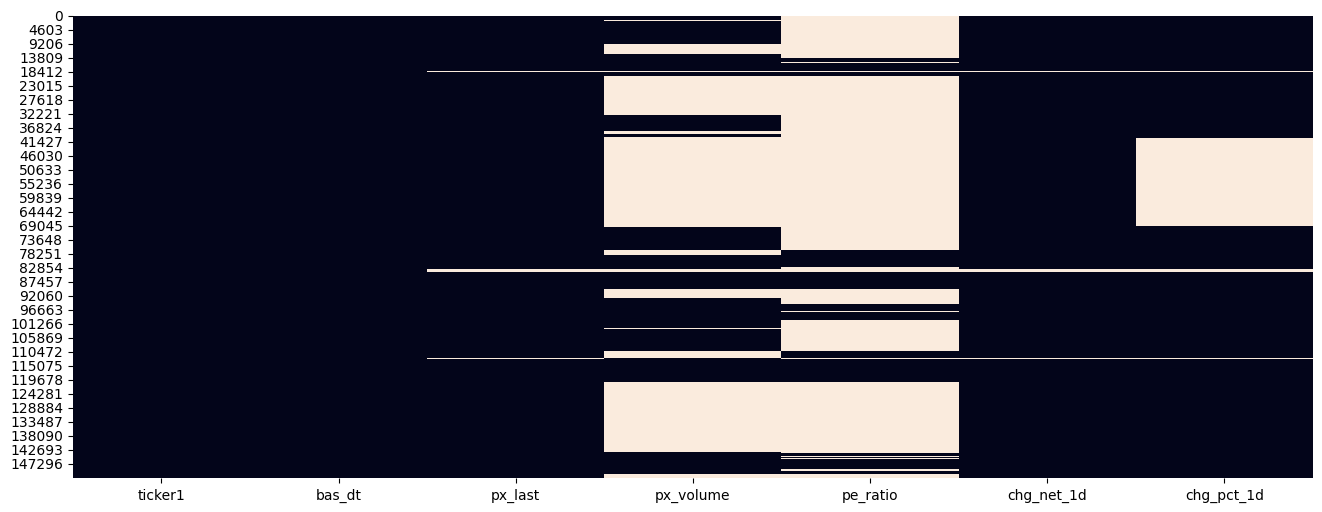

In [ ]:
sns.heatmap(df_test.isnull(), cbar=False) # 결측치 시각화

In [ ]:
df_test.columns # 복사 용이하도록 컬럼 추출

Index(['ticker1', 'bas_dt', 'px_last', 'px_volume', 'pe_ratio', 'chg_net_1d',
       'chg_pct_1d'],
      dtype='object')

In [ ]:
df_test['date'] = df_test['bas_dt'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d')) # 앞으로 편의를 위해 bas_dt를 기반으로 date컬럼 지정(시계열화)
df_test

,ticker1,bas_dt,px_last,px_volume,pe_ratio,chg_net_1d,chg_pct_1d,date
0,TK_CL1 Comdty,19830330,29.40,949.0,NaN,NaN,NaN,1983-03-30
1,TK_CL1 Comdty,19830331,29.29,521.0,NaN,-0.11,-0.37,1983-03-31
2,TK_CL1 Comdty,19830404,29.44,156.0,NaN,0.15,0.51,1983-04-04
3,TK_CL1 Comdty,19830405,29.71,175.0,NaN,0.27,0.92,1983-04-05
4,TK_CL1 Comdty,19830406,29.90,392.0,NaN,0.19,0.64,1983-04-06
...,...,...,...,...,...,...,...,...
151864,TK_SKLILI Index,20191203,NaN,NaN,NaN,NaN,NaN,2019-12-03
151865,TK_SKLILI Index,20200131,118.80,NaN,NaN,0.50,0.40,2020-01-31
151866,TK_SKLILI Index,20200229,119.00,NaN,NaN,0.20,0.20,2020-02-29
151867,TK_SKLILI Index,20200331,118.60,NaN,NaN,-0.40,-0.30,2020-03-31


In [ ]:
df_test = df_test.drop(columns=['px_volume', 'pe_ratio', 'chg_net_1d','chg_pct_1d', 'bas_dt']) # 가격 데이터 빼고 모두 drop
df_test

,ticker1,px_last,date
0,TK_CL1 Comdty,29.40,1983-03-30
1,TK_CL1 Comdty,29.29,1983-03-31
2,TK_CL1 Comdty,29.44,1983-04-04
3,TK_CL1 Comdty,29.71,1983-04-05
4,TK_CL1 Comdty,29.90,1983-04-06
...,...,...,...
151864,TK_SKLILI Index,NaN,2019-12-03
151865,TK_SKLILI Index,118.80,2020-01-31
151866,TK_SKLILI Index,119.00,2020-02-29
151867,TK_SKLILI Index,118.60,2020-03-31


In [ ]:
# 각 ticker1별 결측치 탐지
df_test[df_test['ticker1']=='TK_SKLILI Index'].info() # 자세한 과정은 전처리1.ipynb 파일에 존재합니다. 여러 과정을 통해 결측치를 살펴보고 제거했습니다.
"""
ps. raw data에서 먼저 결측치를 최대한 제거해야 pivot하고 작업을 하다가 이상해서 다시 수정하는 일이 생길 수 있으니 꼼꼼히 확인해야 합니다.
저의 경우, 날짜(bas_dt)에 결측치가 없어서 그냥 진행하다가 특정 지표의 날짜가 잘못되어 결측치가 존재한 부분이 있어서 다시 작업하였습니다.
한국종합선행지수(TK_SKLILI Index)에서 20191231로 되어 있어야 할 날짜가 20191203로 되어 있어 해당 부분이 모두 null값이 나왔습니다.
국가 통계 포털을 참조하여 해당 월의 데이터를 수작업으로 바꿔주었습니다.(자세한 내용은 전처리1.ipynb파일에 있습니다.)

"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 151385 to 151868
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ticker1  484 non-null    object        
 1   px_last  483 non-null    float64       
 2   date     484 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 15.1+ KB


'\nps. raw data에서 먼저 결측치를 최대한 제거해야 pivot하고 작업을 하다가 이상해서 다시 수정하는 일이 생길 수 있으니 꼼꼼히 확인해야 합니다.\n저의 경우, 날짜(bas_dt)에 결측치가 없어서 그냥 진행하다가 특정 지표의 날짜가 잘못되어 결측치가 존재한 부분이 있어서 다시 작업하였습니다.\n한국종합선행지수(TK_SKLILI Index)에서 20191231로 되어 있어야 할 날짜가 20191203로 되어 있어 해당 부분이 모두 null값이 나왔습니다.\n국가 통계 포털을 참조하여 해당 월의 데이터를 수작업으로 바꿔주었습니다.(자세한 내용은 전처리1.ipynb파일에 있습니다.)\n\n'

## Pivot

In [ ]:
df_pivot = pd.pivot(df_test, index='date', columns='ticker1', values='px_last') # index를 date로 ticker1을 컬럼으로 값을 수치로 dataframe을 새로 구성하겠다.
df_pivot
# ps. 현재 코드는 결측치 제거가 제대로 되지 않은 파일이므로 코드 참고용으로만 확인 부탁드립니다.

ticker1,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,TK_KOCPIYOY Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.30,NaN,NaN
1980-01-02,NaN,493.50,85.320,566.0,NaN,NaN,10.502,11.399,NaN,NaN,NaN,NaN,NaN,641.50,NaN,105.76,238.45,NaN,NaN
1980-01-03,NaN,485.70,85.260,591.0,NaN,NaN,10.602,11.459,NaN,NaN,NaN,NaN,NaN,647.50,NaN,105.22,238.35,NaN,NaN
1980-01-04,NaN,491.80,85.230,611.0,NaN,NaN,10.662,11.479,NaN,NaN,NaN,100.00,6560.16,643.00,NaN,106.52,234.80,NaN,NaN
1980-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,16.94,10336.09,100.380,1723.5,NaN,0.955,0.602,0.226,233.70,NaN,NaN,1889.01,19262.00,832.25,NaN,2836.74,107.51,1235.63,117.55
2020-04-27,12.78,10659.99,100.041,1711.9,NaN,0.966,0.661,0.223,235.00,NaN,NaN,1922.77,19783.22,829.00,NaN,2878.48,107.25,1226.12,117.69
2020-04-28,12.34,10795.63,99.865,1710.5,NaN,0.955,0.614,0.213,234.55,NaN,NaN,1934.09,19771.19,826.00,NaN,2863.39,106.87,1225.10,117.58


In [ ]:
# 결측치 보완하고 제대로 된 pivot파일 불러오기
df_daily = pd.read_csv('df_daily_fillna.csv', index_col='date', parse_dates=True).drop(columns='국면')
'''
채권 관련해서도 누락구간이 존재하여 investing.com에서 historical data를 받아와서 보완하였습니다.
완벽하게 수치가 동일하지는 않으나 소숫점 3자리 이하의 오차라 감안하고 진행하기로 하였습니다.
자세한 과정은 결측치.ipynb 파일에 숫자로 목차에 라벨링을 진행해 놓았습니다.
'''
df_daily

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,TK_KOCPIYOY Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.30,NaN,NaN
1980-01-02,NaN,493.50,85.320,566.0,NaN,NaN,10.502,11.399,NaN,NaN,NaN,NaN,NaN,641.50,NaN,105.76,238.45,NaN,NaN
1980-01-03,NaN,485.70,85.260,591.0,NaN,NaN,10.602,11.459,NaN,NaN,NaN,NaN,NaN,647.50,NaN,105.22,238.35,NaN,NaN
1980-01-04,NaN,491.80,85.230,611.0,NaN,NaN,10.662,11.479,NaN,NaN,NaN,100.00,6560.16,643.00,NaN,106.52,234.80,NaN,NaN
1980-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,16.94,10336.09,100.380,1723.5,1.551,0.955,0.602,0.226,233.70,NaN,NaN,1889.01,19262.00,832.25,NaN,2836.74,107.51,1235.63,117.55
2020-04-27,12.78,10659.99,100.041,1711.9,1.574,0.966,0.661,0.223,235.00,NaN,NaN,1922.77,19783.22,829.00,NaN,2878.48,107.25,1226.12,117.69
2020-04-28,12.34,10795.63,99.865,1710.5,1.563,0.955,0.614,0.213,234.55,NaN,NaN,1934.09,19771.19,826.00,NaN,2863.39,106.87,1225.10,117.58


In [ ]:
# 멘토님께 받은 주식 인덱스화 시킨 파일
US_bond = pd.read_csv('Financial_UsBond.csv')
US_bond

,ticker1,bas_dt,px_last,px_volume,pe_ratio,chg_net_1d,chg_pct_1d
0,TK_LT12TRUU Index,19890131,100.67,NaN,NaN,NaN,NaN
1,TK_LT12TRUU Index,19890228,101.18,NaN,NaN,0.51,0.51
2,TK_LT12TRUU Index,19890331,101.85,NaN,NaN,0.67,0.66
3,TK_LT12TRUU Index,19890428,102.90,NaN,NaN,1.05,1.03
4,TK_LT12TRUU Index,19890531,103.82,NaN,NaN,0.92,0.89
...,...,...,...,...,...,...,...
12565,TK_LUTLTRUU Index,20200424,5133.95,NaN,NaN,20.49,0.40
12566,TK_LUTLTRUU Index,20200427,5062.17,NaN,NaN,-71.78,-1.40
12567,TK_LUTLTRUU Index,20200428,5105.20,NaN,NaN,43.03,0.85
12568,TK_LUTLTRUU Index,20200429,5076.02,NaN,NaN,-29.18,-0.57


In [ ]:
US_bond['ticker1'].unique() # 자산 뭐 있는 지 확인

array(['TK_LT12TRUU Index', 'TK_LUTLTRUU Index'], dtype=object)

In [ ]:
US_bond.info() # 결측치 확인(px_last에서 결측치를 확인하는 게 제일 먼저입니다.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12570 entries, 0 to 12569
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ticker1     12570 non-null  object 
 1   bas_dt      12570 non-null  int64  
 2   px_last     12565 non-null  float64
 3   px_volume   0 non-null      float64
 4   pe_ratio    0 non-null      float64
 5   chg_net_1d  12564 non-null  float64
 6   chg_pct_1d  12564 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 687.5+ KB


In [ ]:
US_bond[US_bond['px_last'].isna()] # 결측치 확인 -> 날짜 보니 어차피 월 단위로 resampling 작업을 할 것이기 때문에 의미 없다고 판단하고 진행

,ticker1,bas_dt,px_last,px_volume,pe_ratio,chg_net_1d,chg_pct_1d
324,TK_LT12TRUU Index,19980410,NaN,NaN,NaN,NaN,NaN
2712,TK_LT12TRUU Index,20071026,NaN,NaN,NaN,NaN,NaN
3360,TK_LT12TRUU Index,20100531,NaN,NaN,NaN,NaN,NaN
4069,TK_LT12TRUU Index,20130329,NaN,NaN,NaN,NaN,NaN
7047,TK_LUTLTRUU Index,19980410,NaN,NaN,NaN,NaN,NaN


In [ ]:
US_bond['date'] = US_bond['bas_dt'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d')) # 시계열 정보 추출
US_bond

,ticker1,bas_dt,px_last,px_volume,pe_ratio,chg_net_1d,chg_pct_1d,date
0,TK_LT12TRUU Index,19890131,100.67,NaN,NaN,NaN,NaN,1989-01-31
1,TK_LT12TRUU Index,19890228,101.18,NaN,NaN,0.51,0.51,1989-02-28
2,TK_LT12TRUU Index,19890331,101.85,NaN,NaN,0.67,0.66,1989-03-31
3,TK_LT12TRUU Index,19890428,102.90,NaN,NaN,1.05,1.03,1989-04-28
4,TK_LT12TRUU Index,19890531,103.82,NaN,NaN,0.92,0.89,1989-05-31
...,...,...,...,...,...,...,...,...
12565,TK_LUTLTRUU Index,20200424,5133.95,NaN,NaN,20.49,0.40,2020-04-24
12566,TK_LUTLTRUU Index,20200427,5062.17,NaN,NaN,-71.78,-1.40,2020-04-27
12567,TK_LUTLTRUU Index,20200428,5105.20,NaN,NaN,43.03,0.85,2020-04-28
12568,TK_LUTLTRUU Index,20200429,5076.02,NaN,NaN,-29.18,-0.57,2020-04-29


In [ ]:
US_bond[US_bond['ticker1']=='TK_LT12TRUU Index'] # 앞에부분 조금 이상해서 확인(resampling작업할 때 이상하게 나올 것 같아서)

,ticker1,bas_dt,px_last,px_volume,pe_ratio,chg_net_1d,chg_pct_1d,date
0,TK_LT12TRUU Index,19890131,100.67,NaN,NaN,NaN,NaN,1989-01-31
1,TK_LT12TRUU Index,19890228,101.18,NaN,NaN,0.51,0.51,1989-02-28
2,TK_LT12TRUU Index,19890331,101.85,NaN,NaN,0.67,0.66,1989-03-31
3,TK_LT12TRUU Index,19890428,102.90,NaN,NaN,1.05,1.03,1989-04-28
4,TK_LT12TRUU Index,19890531,103.82,NaN,NaN,0.92,0.89,1989-05-31
...,...,...,...,...,...,...,...,...
5841,TK_LT12TRUU Index,20200424,277.16,NaN,NaN,-0.01,0.00,2020-04-24
5842,TK_LT12TRUU Index,20200427,277.17,NaN,NaN,0.01,0.00,2020-04-27
5843,TK_LT12TRUU Index,20200428,277.18,NaN,NaN,0.01,0.00,2020-04-28
5844,TK_LT12TRUU Index,20200429,277.17,NaN,NaN,-0.01,0.00,2020-04-29


In [ ]:
US_bond[US_bond['ticker1']=='TK_LT12TRUU Index'].iloc[0:36] # 값이 기존 변수랑 달라서 월 수익률 다르게 계산하기로 하고 작업 시작

,ticker1,bas_dt,px_last,px_volume,pe_ratio,chg_net_1d,chg_pct_1d,date
0,TK_LT12TRUU Index,19890131,100.67,NaN,NaN,NaN,NaN,1989-01-31
1,TK_LT12TRUU Index,19890228,101.18,NaN,NaN,0.51,0.51,1989-02-28
2,TK_LT12TRUU Index,19890331,101.85,NaN,NaN,0.67,0.66,1989-03-31
3,TK_LT12TRUU Index,19890428,102.90,NaN,NaN,1.05,1.03,1989-04-28
4,TK_LT12TRUU Index,19890531,103.82,NaN,NaN,0.92,0.89,1989-05-31
5,TK_LT12TRUU Index,19890630,104.87,NaN,NaN,1.05,1.01,1989-06-30
6,TK_LT12TRUU Index,19890731,105.79,NaN,NaN,0.92,0.88,1989-07-31
7,TK_LT12TRUU Index,19890831,106.21,NaN,NaN,0.42,0.40,1989-08-31
8,TK_LT12TRUU Index,19890929,106.92,NaN,NaN,0.71,0.67,1989-09-29
9,TK_LT12TRUU Index,19891031,107.89,NaN,NaN,0.97,0.91,1989-10-31


In [ ]:
# 사본 만들기
df_test_bond = US_bond.copy()
df_test_bond

,ticker1,bas_dt,px_last,px_volume,pe_ratio,chg_net_1d,chg_pct_1d,date
0,TK_LT12TRUU Index,19890131,100.67,NaN,NaN,NaN,NaN,1989-01-31
1,TK_LT12TRUU Index,19890228,101.18,NaN,NaN,0.51,0.51,1989-02-28
2,TK_LT12TRUU Index,19890331,101.85,NaN,NaN,0.67,0.66,1989-03-31
3,TK_LT12TRUU Index,19890428,102.90,NaN,NaN,1.05,1.03,1989-04-28
4,TK_LT12TRUU Index,19890531,103.82,NaN,NaN,0.92,0.89,1989-05-31
...,...,...,...,...,...,...,...,...
12565,TK_LUTLTRUU Index,20200424,5133.95,NaN,NaN,20.49,0.40,2020-04-24
12566,TK_LUTLTRUU Index,20200427,5062.17,NaN,NaN,-71.78,-1.40,2020-04-27
12567,TK_LUTLTRUU Index,20200428,5105.20,NaN,NaN,43.03,0.85,2020-04-28
12568,TK_LUTLTRUU Index,20200429,5076.02,NaN,NaN,-29.18,-0.57,2020-04-29


In [ ]:
# 붙이려는 데이터에 맞게 컬럼 맞춰주기
df_test_bond.drop(columns=['bas_dt', 'px_volume', 'pe_ratio', 'chg_net_1d', 'chg_pct_1d'],inplace=True)
df_test_bond

,ticker1,px_last,date
0,TK_LT12TRUU Index,100.67,1989-01-31
1,TK_LT12TRUU Index,101.18,1989-02-28
2,TK_LT12TRUU Index,101.85,1989-03-31
3,TK_LT12TRUU Index,102.90,1989-04-28
4,TK_LT12TRUU Index,103.82,1989-05-31
...,...,...,...
12565,TK_LUTLTRUU Index,5133.95,2020-04-24
12566,TK_LUTLTRUU Index,5062.17,2020-04-27
12567,TK_LUTLTRUU Index,5105.20,2020-04-28
12568,TK_LUTLTRUU Index,5076.02,2020-04-29


In [ ]:
# 기존 데이터에 붙여넣고 리샘플링(index맞춰주기 위해서)하기로함
df_all = pd.concat([df_test, df_test_bond])
df_all

,ticker1,bas_dt,px_last,px_volume,pe_ratio,chg_net_1d,chg_pct_1d,date
0,TK_CL1 Comdty,19830330,29.40,949.0,NaN,NaN,NaN,1983-03-30
1,TK_CL1 Comdty,19830331,29.29,521.0,NaN,-0.11,-0.37,1983-03-31
2,TK_CL1 Comdty,19830404,29.44,156.0,NaN,0.15,0.51,1983-04-04
3,TK_CL1 Comdty,19830405,29.71,175.0,NaN,0.27,0.92,1983-04-05
4,TK_CL1 Comdty,19830406,29.90,392.0,NaN,0.19,0.64,1983-04-06
...,...,...,...,...,...,...,...,...
12565,TK_LUTLTRUU Index,20200424,5133.95,NaN,NaN,20.49,0.40,2020-04-24
12566,TK_LUTLTRUU Index,20200427,5062.17,NaN,NaN,-71.78,-1.40,2020-04-27
12567,TK_LUTLTRUU Index,20200428,5105.20,NaN,NaN,43.03,0.85,2020-04-28
12568,TK_LUTLTRUU Index,20200429,5076.02,NaN,NaN,-29.18,-0.57,2020-04-29


In [ ]:
# pivot
df_pivot_all = pd.pivot(df_all, index='date', columns='ticker1', values='px_last') # index를 date로 ticker1을 컬럼으로 값을 수치로 dataframe을 새로 구성하겠다.
df_pivot_all

ticker1,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,...,TK_KOSPI Index,TK_LT12TRUU Index,TK_LUTLTRUU Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.30,NaN,NaN
1980-01-02,NaN,493.50,85.320,566.0,NaN,NaN,10.502,11.399,NaN,NaN,...,NaN,NaN,NaN,NaN,641.50,NaN,105.76,238.45,NaN,NaN
1980-01-03,NaN,485.70,85.260,591.0,NaN,NaN,10.602,11.459,NaN,NaN,...,NaN,NaN,NaN,NaN,647.50,NaN,105.22,238.35,NaN,NaN
1980-01-04,NaN,491.80,85.230,611.0,NaN,NaN,10.662,11.479,NaN,NaN,...,100.00,NaN,NaN,6560.16,643.00,NaN,106.52,234.80,NaN,NaN
1980-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,16.94,10336.09,100.380,1723.5,NaN,0.955,0.602,0.226,233.70,NaN,...,1889.01,277.16,5133.95,19262.00,832.25,NaN,2836.74,107.51,1235.63,117.55
2020-04-27,12.78,10659.99,100.041,1711.9,NaN,0.966,0.661,0.223,235.00,NaN,...,1922.77,277.17,5062.17,19783.22,829.00,NaN,2878.48,107.25,1226.12,117.69
2020-04-28,12.34,10795.63,99.865,1710.5,NaN,0.955,0.614,0.213,234.55,NaN,...,1934.09,277.18,5105.20,19771.19,826.00,NaN,2863.39,106.87,1225.10,117.58


In [ ]:
# 기존 채권 data drop
df_pivot_all.drop(columns=['TK_GTKRW10Y Corp', 'TK_GTKRW2Y Corp', 'TK_GTUSD10Y Govt', 'TK_GTUSD2Y Govt'], inplace=True)
df_pivot_all

ticker1,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOCPIYOY Index,TK_KOSPI Index,TK_LT12TRUU Index,TK_LUTLTRUU Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.30,NaN,NaN
1980-01-02,NaN,493.50,85.320,566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.50,NaN,105.76,238.45,NaN,NaN
1980-01-03,NaN,485.70,85.260,591.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,647.50,NaN,105.22,238.35,NaN,NaN
1980-01-04,NaN,491.80,85.230,611.0,NaN,NaN,NaN,100.00,NaN,NaN,6560.16,643.00,NaN,106.52,234.80,NaN,NaN
1980-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,16.94,10336.09,100.380,1723.5,233.70,NaN,NaN,1889.01,277.16,5133.95,19262.00,832.25,NaN,2836.74,107.51,1235.63,117.55
2020-04-27,12.78,10659.99,100.041,1711.9,235.00,NaN,NaN,1922.77,277.17,5062.17,19783.22,829.00,NaN,2878.48,107.25,1226.12,117.69
2020-04-28,12.34,10795.63,99.865,1710.5,234.55,NaN,NaN,1934.09,277.18,5105.20,19771.19,826.00,NaN,2863.39,106.87,1225.10,117.58


In [ ]:
df_pivot_all.columns = ['경질 원유 선물', '독일 DAX 30지수', '달러인덱스', '금 선물',
       '구리 선물', '한국소비자물가지수','한국소비자물가지수 전월대비 증감율', '코스피지수', '닛케이 225지수',
       'S&P 500지수', '한국종합선행지수', '대두 선물',
       'USDJPY 현물환율(기준통화USD)', 'USDKRW 현물환율(기준통화USD)', '필라델피아 금은지수',
       'US 국고단기채', 'US 국고장기채']
df_pivot_all

,경질 원유 선물,독일 DAX 30지수,달러인덱스,금 선물,구리 선물,한국소비자물가지수,한국소비자물가지수 전월대비 증감율,코스피지수,닛케이 225지수,대두 선물,한국종합선행지수,S&P 500지수,USDJPY 현물환율(기준통화USD),USDKRW 현물환율(기준통화USD),필라델피아 금은지수,US 국고단기채,US 국고장기채
date,,,,,,,,,,,,,,,,,
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.30,NaN,NaN
1980-01-02,NaN,493.50,85.320,566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.50,NaN,105.76,238.45,NaN,NaN
1980-01-03,NaN,485.70,85.260,591.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,647.50,NaN,105.22,238.35,NaN,NaN
1980-01-04,NaN,491.80,85.230,611.0,NaN,NaN,NaN,100.00,NaN,NaN,6560.16,643.00,NaN,106.52,234.80,NaN,NaN
1980-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,16.94,10336.09,100.380,1723.5,233.70,NaN,NaN,1889.01,277.16,5133.95,19262.00,832.25,NaN,2836.74,107.51,1235.63,117.55
2020-04-27,12.78,10659.99,100.041,1711.9,235.00,NaN,NaN,1922.77,277.17,5062.17,19783.22,829.00,NaN,2878.48,107.25,1226.12,117.69
2020-04-28,12.34,10795.63,99.865,1710.5,234.55,NaN,NaN,1934.09,277.18,5105.20,19771.19,826.00,NaN,2863.39,106.87,1225.10,117.58


## 월별 수익률 구하기

In [ ]:
# 월 초 값으로 resample 진행
beginning_price = df_daily.resample('M').first()
beginning_price

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,TK_KOCPIYOY Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,
1980-01-31,NaN,493.50,85.320,566.0,NaN,NaN,10.502,11.399,NaN,19.363,25.4,100.00,6560.16,641.50,11.2,105.76,240.30,NaN,NaN
1980-02-29,NaN,509.10,86.130,683.3,NaN,NaN,11.292,12.049,NaN,20.201,26.4,104.48,6777.64,668.50,11.3,115.12,240.45,NaN,NaN
1980-03-31,NaN,518.70,87.850,641.0,NaN,NaN,12.792,14.839,NaN,20.953,28.8,103.96,6793.56,637.50,11.5,112.50,247.85,NaN,NaN
1980-04-30,NaN,478.10,94.220,498.5,NaN,NaN,12.692,14.599,NaN,21.107,26.6,105.43,6502.80,579.50,11.6,102.18,254.65,NaN,NaN
1980-05-31,NaN,492.20,88.220,520.0,NaN,NaN,10.572,10.709,NaN,21.771,26.6,116.54,6865.08,590.25,11.7,105.46,240.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,55.96,12964.68,97.856,1462.3,1.682,1.398,1.820,1.603,263.25,105.120,0.7,2091.92,23529.50,870.50,118.4,3113.87,108.98,1183.15,96.03
2020-01-31,61.18,13385.93,96.445,1528.1,1.672,1.361,1.919,1.571,282.50,105.790,1.5,2175.17,23204.86,944.25,118.8,3257.85,108.76,1154.75,106.51
2020-02-29,50.11,13045.19,97.800,1577.2,1.546,1.290,1.528,1.355,250.70,105.800,1.1,2118.88,22971.94,877.00,119.0,3248.92,108.69,1194.91,102.96


In [ ]:
# 월 초 값으로 resample 진행
beginning_price_bond = df_pivot_all.resample('M').first()
beginning_price_bond

ticker1,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,...,TK_KOSPI Index,TK_LT12TRUU Index,TK_LUTLTRUU Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,NaN,493.50,85.320,566.0,NaN,NaN,10.502,11.399,NaN,19.363,...,100.00,NaN,123.22,6560.16,641.50,11.2,105.76,240.30,NaN,NaN
1980-02-29,NaN,509.10,86.130,683.3,NaN,NaN,11.292,12.049,NaN,20.201,...,104.48,NaN,114.21,6777.64,668.50,11.3,115.12,240.45,NaN,NaN
1980-03-31,NaN,518.70,87.850,641.0,NaN,NaN,12.792,14.839,NaN,20.953,...,103.96,NaN,114.08,6793.56,637.50,11.5,112.50,247.85,NaN,NaN
1980-04-30,NaN,478.10,94.220,498.5,NaN,NaN,12.692,14.599,NaN,21.107,...,105.43,NaN,130.43,6502.80,579.50,11.6,102.18,254.65,NaN,NaN
1980-05-31,NaN,492.20,88.220,520.0,NaN,NaN,10.572,10.709,NaN,21.771,...,116.54,NaN,136.04,6865.08,590.25,11.7,105.46,240.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,55.96,12964.68,97.856,1462.3,1.679,1.398,1.820,1.603,263.25,105.120,...,2091.92,274.44,4155.21,23529.50,870.50,NaN,3113.87,108.98,1183.15,96.03
2020-01-31,61.18,13385.93,96.445,1528.1,1.637,1.361,1.919,1.571,282.50,105.790,...,2175.17,274.86,4127.28,23204.86,944.25,118.8,3257.85,108.76,1154.75,106.51
2020-02-29,50.11,13045.19,97.800,1577.2,1.600,1.290,1.528,1.355,250.70,105.800,...,2118.88,275.28,4393.06,22971.94,877.00,119.0,3248.92,108.69,1194.91,102.96


In [ ]:
"""
보내주셨던 자산의 경우 내용을 확인해 보니 첫날 데이터로 수익률을 구해야 의미있는 데이터가 나올 것 같아서
(초창기 데이터는 월 간격으로 존재 + 매일 변동폭이 거의 없음 = 0에 가까움)
월 수익률 데이터 = (해당 월의 첫째날 - 다음 월의 첫째날)/해당 월의 첫째날
로 구하였습니다. 아래 있는 채권 관련 목차는 무시하시면 됩니다.
"""
diff_bond = (beginning_price_bond - beginning_price_bond.shift(1)).shift(-1)
monthly_return_bond = diff_bond.div(beginning_price_bond)
monthly_return_bond

ticker1,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,...,TK_KOSPI Index,TK_LT12TRUU Index,TK_LUTLTRUU Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,NaN,0.031611,0.009494,0.207244,NaN,NaN,0.075224,0.057023,NaN,0.043278,...,0.044800,NaN,-0.073121,0.033152,0.042089,0.008929,0.088502,0.000624,NaN,NaN
1980-02-29,NaN,0.018857,0.019970,-0.061905,NaN,NaN,0.132837,0.231554,NaN,0.037226,...,-0.004977,NaN,-0.001138,0.002349,-0.046372,0.017699,-0.022759,0.030776,NaN,NaN
1980-03-31,NaN,-0.078273,0.072510,-0.222309,NaN,NaN,-0.007817,-0.016174,NaN,0.007350,...,0.014140,NaN,0.143320,-0.042799,-0.090980,0.008696,-0.091733,0.027436,NaN,NaN
1980-04-30,NaN,0.029492,-0.063681,0.043129,NaN,NaN,-0.167034,-0.266457,NaN,0.031459,...,0.105378,NaN,0.043012,0.055711,0.018550,0.008621,0.032100,-0.055566,NaN,NaN
1980-05-31,NaN,0.011377,-0.024144,0.089231,NaN,NaN,-0.024593,-0.126996,NaN,0.012172,...,0.001974,NaN,0.029256,-0.000347,0.042355,0.008547,0.050256,-0.070478,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.093281,0.032492,-0.014419,0.044998,-0.025015,-0.026466,0.054396,-0.019963,0.073124,0.006374,...,0.039796,0.001530,-0.006722,-0.013797,0.084721,NaN,0.046238,-0.002019,-0.024004,0.109133
2020-01-31,-0.180941,-0.025455,0.014049,0.032131,-0.022602,-0.052168,-0.203752,-0.137492,-0.112566,0.000095,...,-0.025878,0.001528,0.064396,-0.010038,-0.071221,0.001684,-0.002741,-0.000644,0.034778,-0.033330
2020-02-29,-0.067052,-0.091016,-0.004499,0.011159,-0.139375,-0.104651,-0.237565,-0.332103,0.037495,-0.002457,...,-0.054921,0.002724,0.068340,-0.070863,0.015393,-0.003361,-0.048844,-0.003312,-0.001121,-0.049437


In [ ]:
# index 크기 맞춰주는 작업입니다. 이후 작업은 마르코프 모델로 국면 분할 이후 진행한 monthly_return_regime 뒤에 붙여주었습니다.
# 목차의 마르코프 모델 4국면 분할 이후로 살펴보시면 이어집니다.
monthly_return_bond = monthly_return_bond.iloc[12:]
monthly_return_bond

ticker1,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,...,TK_KOSPI Index,TK_LT12TRUU Index,TK_LUTLTRUU Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.037959,0.047619,-0.189235,NaN,NaN,0.035421,0.031276,NaN,0.007982,...,0.078652,NaN,-0.039098,0.023928,-0.097786,0.007937,-0.069165,0.000246,NaN,NaN
1981-02-28,NaN,0.004879,0.033010,-0.035270,NaN,NaN,0.059089,0.065833,NaN,0.019339,...,-0.013258,NaN,0.030845,-0.022737,-0.036128,0.015748,0.040186,0.039134,NaN,NaN
1981-03-31,NaN,0.037999,-0.017050,0.110968,NaN,NaN,-0.035237,-0.083975,NaN,0.008627,...,0.032630,NaN,-0.052921,0.032759,0.095474,0.007752,0.034543,0.006158,NaN,NaN
1981-04-30,NaN,0.026236,0.041545,-0.039876,NaN,NaN,0.069244,0.115918,NaN,0.022254,...,0.148699,NaN,0.064448,0.025118,0.003551,0.007692,-0.028191,0.015772,0.006219,NaN
1981-05-31,NaN,-0.004954,0.046968,-0.042944,NaN,NaN,-0.041987,-0.016973,NaN,0.027600,...,0.022654,NaN,-0.021314,0.001893,-0.031200,0.015267,-0.002336,0.031286,0.007063,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.093281,0.032492,-0.014419,0.044998,-0.025015,-0.026466,0.054396,-0.019963,0.073124,0.006374,...,0.039796,0.001530,-0.006722,-0.013797,0.084721,NaN,0.046238,-0.002019,-0.024004,0.109133
2020-01-31,-0.180941,-0.025455,0.014049,0.032131,-0.022602,-0.052168,-0.203752,-0.137492,-0.112566,0.000095,...,-0.025878,0.001528,0.064396,-0.010038,-0.071221,0.001684,-0.002741,-0.000644,0.034778,-0.033330
2020-02-29,-0.067052,-0.091016,-0.004499,0.011159,-0.139375,-0.104651,-0.237565,-0.332103,0.037495,-0.002457,...,-0.054921,0.002724,0.068340,-0.070863,0.015393,-0.003361,-0.048844,-0.003312,-0.001121,-0.049437


In [ ]:
# 채권 마지막 날 결측치 보완하기 위한 코드입니다.
end_price_bond = df_pivot_all.resample('M').last()
end_price_bond

ticker1,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,...,TK_KOSPI Index,TK_LT12TRUU Index,TK_LUTLTRUU Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,NaN,504.00,86.140,681.5,NaN,NaN,11.132,11.879,NaN,19.363,...,105.89,NaN,123.22,6768.16,673.00,11.2,114.16,239.33,NaN,NaN
1980-02-29,NaN,521.50,87.650,640.0,NaN,NaN,12.722,14.739,NaN,20.201,...,103.74,NaN,114.21,6764.89,633.25,11.3,113.66,251.65,NaN,NaN
1980-03-31,NaN,475.20,93.580,501.5,NaN,NaN,12.642,14.639,NaN,20.953,...,105.00,NaN,114.08,6556.19,583.00,11.5,102.09,249.95,NaN,NaN
1980-04-30,NaN,496.10,88.110,507.0,NaN,NaN,10.762,10.819,NaN,21.107,...,116.09,NaN,130.43,6865.56,594.50,11.6,106.29,239.35,NaN,NaN
1980-05-31,NaN,501.50,85.930,545.2,NaN,NaN,10.252,9.259,NaN,21.771,...,116.43,NaN,136.04,6855.70,623.75,11.7,111.24,223.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,61.06,13249.01,96.389,1523.1,1.679,1.365,1.919,1.571,279.7,105.120,...,2197.67,274.82,4098.99,23656.62,943.00,NaN,3230.78,108.61,1155.84,106.92
2020-01-31,51.56,12981.97,97.390,1582.9,1.570,1.300,1.508,1.316,251.7,105.790,...,2119.01,275.24,4379.57,23205.18,872.50,118.8,3225.52,108.35,1191.74,103.94
2020-02-29,44.76,11890.35,98.132,1566.7,1.331,1.253,1.150,0.915,254.6,105.800,...,1987.01,275.88,4673.03,21142.96,883.50,119.0,2954.22,107.89,1214.73,94.15


In [ ]:
diff_last_bond = (end_price_bond - beginning_price_bond)
monthly_return_bond_last = diff_last_bond.div(beginning_price_bond)
monthly_return_bond_last

ticker1,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,...,TK_KOSPI Index,TK_LT12TRUU Index,TK_LUTLTRUU Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,NaN,0.021277,0.009611,0.204064,NaN,NaN,0.059989,0.042109,NaN,0.0,...,0.058900,NaN,0.000000,0.031707,0.049104,0.0,0.079425,-0.004037,NaN,NaN
1980-02-29,NaN,0.024357,0.017648,-0.063369,NaN,NaN,0.126638,0.223255,NaN,0.0,...,-0.007083,NaN,0.000000,-0.001881,-0.052730,0.0,-0.012682,0.046579,NaN,NaN
1980-03-31,NaN,-0.083864,0.065225,-0.217629,NaN,NaN,-0.011726,-0.013478,NaN,0.0,...,0.010004,NaN,0.000000,-0.034940,-0.085490,0.0,-0.092533,0.008473,NaN,NaN
1980-04-30,NaN,0.037649,-0.064848,0.017051,NaN,NaN,-0.152064,-0.258922,NaN,0.0,...,0.101110,NaN,0.000000,0.055785,0.025884,0.0,0.040223,-0.060082,NaN,NaN
1980-05-31,NaN,0.018895,-0.025958,0.048462,NaN,NaN,-0.030269,-0.135400,NaN,0.0,...,-0.000944,NaN,0.000000,-0.001366,0.056756,0.0,0.054808,-0.072765,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,0.000000,-0.023605,0.054396,-0.019963,0.062488,0.0,...,0.050552,0.001385,-0.013530,0.005403,0.083285,NaN,0.037545,-0.003395,-0.023082,0.113402
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.040929,-0.044820,-0.214174,-0.162317,-0.109027,0.0,...,-0.025819,0.001383,0.061127,0.000014,-0.075986,0.0,-0.009924,-0.003770,0.032033,-0.024129
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,-0.168125,-0.028682,-0.247382,-0.324723,0.015556,0.0,...,-0.062236,0.002180,0.063730,-0.079618,0.007412,0.0,-0.090707,-0.007360,0.016587,-0.085567


In [ ]:
beginning_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484 entries, 1980-01-31 to 2020-04-30
Freq: M
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TK_CL1 Comdty         446 non-null    float64
 1   TK_DAX Index          484 non-null    float64
 2   TK_DXY Curncy         484 non-null    float64
 3   TK_GC1 Comdty         484 non-null    float64
 4   TK_GTKRW10Y Corp      235 non-null    float64
 5   TK_GTKRW2Y Corp       261 non-null    float64
 6   TK_GTUSD10Y Govt      484 non-null    float64
 7   TK_GTUSD2Y Govt       484 non-null    float64
 8   TK_HG1 Comdty         381 non-null    float64
 9   TK_KOCPI Index        484 non-null    float64
 10  TK_KOCPIYOY Index     484 non-null    float64
 11  TK_KOSPI Index        484 non-null    float64
 12  TK_NKY Index          484 non-null    float64
 13  TK_S 1 Comdty         484 non-null    float64
 14  TK_SKLILI Index       484 non-null    float64
 

In [ ]:
# 월 말 값으로 resample 진행
end_price = df_daily.resample('M').last()
end_price

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,TK_KOCPIYOY Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,
1980-01-31,NaN,504.00,86.140,681.5,NaN,NaN,11.132,11.879,NaN,19.363,25.4,105.89,6768.16,673.00,11.2,114.16,239.33,NaN,NaN
1980-02-29,NaN,521.50,87.650,640.0,NaN,NaN,12.722,14.739,NaN,20.201,26.4,103.74,6764.89,633.25,11.3,113.66,251.65,NaN,NaN
1980-03-31,NaN,475.20,93.580,501.5,NaN,NaN,12.642,14.639,NaN,20.953,28.8,105.00,6556.19,583.00,11.5,102.09,249.95,NaN,NaN
1980-04-30,NaN,496.10,88.110,507.0,NaN,NaN,10.762,10.819,NaN,21.107,26.6,116.09,6865.56,594.50,11.6,106.29,239.35,NaN,NaN
1980-05-31,NaN,501.50,85.930,545.2,NaN,NaN,10.252,9.259,NaN,21.771,26.6,116.43,6855.70,623.75,11.7,111.24,223.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,61.06,13249.01,96.389,1523.1,1.672,1.365,1.919,1.571,279.7,105.120,0.7,2197.67,23656.62,943.00,118.4,3230.78,108.61,1155.84,106.92
2020-01-31,51.56,12981.97,97.390,1582.9,1.555,1.300,1.508,1.316,251.7,105.790,1.5,2119.01,23205.18,872.50,118.8,3225.52,108.35,1191.74,103.94
2020-02-29,44.76,11890.35,98.132,1566.7,1.327,1.253,1.150,0.915,254.6,105.800,1.1,1987.01,21142.96,883.50,119.0,2954.22,107.89,1214.73,94.15


In [ ]:
end_price.info() # beginning_price 와 정확히 매칭됨

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484 entries, 1980-01-31 to 2020-04-30
Freq: M
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TK_CL1 Comdty         446 non-null    float64
 1   TK_DAX Index          484 non-null    float64
 2   TK_DXY Curncy         484 non-null    float64
 3   TK_GC1 Comdty         484 non-null    float64
 4   TK_GTKRW10Y Corp      235 non-null    float64
 5   TK_GTKRW2Y Corp       261 non-null    float64
 6   TK_GTUSD10Y Govt      484 non-null    float64
 7   TK_GTUSD2Y Govt       484 non-null    float64
 8   TK_HG1 Comdty         381 non-null    float64
 9   TK_KOCPI Index        484 non-null    float64
 10  TK_KOCPIYOY Index     484 non-null    float64
 11  TK_KOSPI Index        484 non-null    float64
 12  TK_NKY Index          484 non-null    float64
 13  TK_S 1 Comdty         484 non-null    float64
 14  TK_SKLILI Index       484 non-null    float64
 

In [ ]:
# 월 별 수익률 구하기
diff = (end_price - beginning_price)
monthly_return = diff.div(beginning_price)
monthly_return

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,TK_KOCPIYOY Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,
1980-01-31,NaN,0.021277,0.009611,0.204064,NaN,NaN,0.059989,0.042109,NaN,0.0,0.0,0.058900,0.031707,0.049104,0.0,0.079425,-0.004037,NaN,NaN
1980-02-29,NaN,0.024357,0.017648,-0.063369,NaN,NaN,0.126638,0.223255,NaN,0.0,0.0,-0.007083,-0.001881,-0.052730,0.0,-0.012682,0.046579,NaN,NaN
1980-03-31,NaN,-0.083864,0.065225,-0.217629,NaN,NaN,-0.011726,-0.013478,NaN,0.0,0.0,0.010004,-0.034940,-0.085490,0.0,-0.092533,0.008473,NaN,NaN
1980-04-30,NaN,0.037649,-0.064848,0.017051,NaN,NaN,-0.152064,-0.258922,NaN,0.0,0.0,0.101110,0.055785,0.025884,0.0,0.040223,-0.060082,NaN,NaN
1980-05-31,NaN,0.018895,-0.025958,0.048462,NaN,NaN,-0.030269,-0.135400,NaN,0.0,0.0,-0.000944,-0.001366,0.056756,0.0,0.054808,-0.072765,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,-0.005945,-0.023605,0.054396,-0.019963,0.062488,0.0,0.0,0.050552,0.005403,0.083285,0.0,0.037545,-0.003395,-0.023082,0.113402
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.069976,-0.044820,-0.214174,-0.162317,-0.109027,0.0,0.0,-0.025819,0.000014,-0.075986,0.0,-0.009924,-0.003770,0.032033,-0.024129
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,-0.141656,-0.028682,-0.247382,-0.324723,0.015556,0.0,0.0,-0.062236,-0.079618,0.007412,0.0,-0.090707,-0.007360,0.016587,-0.085567


### 자산별 특징을 고려하여 추가 작업

#### 채권

In [ ]:
monthly_return.columns

Index(['TK_CL1 Comdty', 'TK_DAX Index', 'TK_DXY Curncy', 'TK_GC1 Comdty',
       'TK_GTKRW10Y Corp', 'TK_GTKRW2Y Corp', 'TK_GTUSD10Y Govt',
       'TK_GTUSD2Y Govt', 'TK_HG1 Comdty', 'TK_KOCPI Index',
       'TK_KOCPIYOY Index', 'TK_KOSPI Index', 'TK_NKY Index', 'TK_S 1 Comdty',
       'TK_SKLILI Index', 'TK_SPX Index', 'TK_USDJPY BGN Curncy',
       'TK_USDKRW BGN Curncy', 'TK_XAU Index'],
      dtype='object')

In [ ]:
monthly_return['TK_GTKRW10Y Corp'] = diff['TK_GTKRW10Y Corp']
monthly_return['TK_GTKRW2Y Corp'] = diff['TK_GTKRW2Y Corp']
monthly_return['TK_GTUSD10Y Govt'] = diff['TK_GTUSD10Y Govt']
monthly_return['TK_GTUSD2Y Govt'] = diff['TK_GTUSD2Y Govt']
monthly_return

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,TK_KOCPIYOY Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,
1980-01-31,NaN,0.021277,0.009611,0.204064,NaN,NaN,0.630,0.480,NaN,0.0,0.0,0.058900,0.031707,0.049104,0.0,0.079425,-0.004037,NaN,NaN
1980-02-29,NaN,0.024357,0.017648,-0.063369,NaN,NaN,1.430,2.690,NaN,0.0,0.0,-0.007083,-0.001881,-0.052730,0.0,-0.012682,0.046579,NaN,NaN
1980-03-31,NaN,-0.083864,0.065225,-0.217629,NaN,NaN,-0.150,-0.200,NaN,0.0,0.0,0.010004,-0.034940,-0.085490,0.0,-0.092533,0.008473,NaN,NaN
1980-04-30,NaN,0.037649,-0.064848,0.017051,NaN,NaN,-1.930,-3.780,NaN,0.0,0.0,0.101110,0.055785,0.025884,0.0,0.040223,-0.060082,NaN,NaN
1980-05-31,NaN,0.018895,-0.025958,0.048462,NaN,NaN,-0.320,-1.450,NaN,0.0,0.0,-0.000944,-0.001366,0.056756,0.0,0.054808,-0.072765,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,-0.010,-0.033,0.099,-0.032,0.062488,0.0,0.0,0.050552,0.005403,0.083285,0.0,0.037545,-0.003395,-0.023082,0.113402
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.117,-0.061,-0.411,-0.255,-0.109027,0.0,0.0,-0.025819,0.000014,-0.075986,0.0,-0.009924,-0.003770,0.032033,-0.024129
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,-0.219,-0.037,-0.378,-0.440,0.015556,0.0,0.0,-0.062236,-0.079618,0.007412,0.0,-0.090707,-0.007360,0.016587,-0.085567


#### 매크로 변수(한국종합선행지수, 소비자물가지수)

In [ ]:
# 해당 자산들이 0이 나온 이유는 월 단위로 존재하는 데이터이기 때문에 월 첫째날과 마지막 날로 리샘플링 했을 때 같은 값이 나오기 때문
# 또한 해당 자산의 경우 계절성이 강하게 존재하기 때문에 이를 없애주기 위해 전년 동월 대비 차로 비율을 구함
diff_macro = (beginning_price - beginning_price.shift(12)).shift(-12)
macro = diff_macro.div(beginning_price).shift(12)
macro

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,TK_KOCPIYOY Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,
1980-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.056846,0.130760,0.008409,0.185104,-0.209958,-0.269592,-0.387412,-0.431963,-0.059654,0.007379,-0.461538,-0.018767,0.042292,-0.038918,0.043172,0.115934,-0.041175,0.065392,0.458536
2020-01-31,0.314568,0.265188,0.003747,0.190016,-0.145194,-0.244309,-0.285289,-0.369076,0.077011,0.014870,0.875000,0.082174,0.186224,0.055323,0.045775,0.297933,-0.008930,0.036673,0.501410
2020-02-29,-0.093196,0.166764,0.023237,0.197661,-0.220373,-0.284922,-0.430912,-0.459082,-0.095925,0.010603,1.200000,-0.038385,0.105037,-0.044402,0.045694,0.200401,-0.007397,0.067828,0.356343


In [ ]:
monthly_return['TK_KOCPI Index'] = macro['TK_KOCPI Index']
monthly_return['TK_SKLILI Index'] = macro['TK_SKLILI Index']
monthly_return

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,TK_KOCPIYOY Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,
1980-01-31,NaN,0.021277,0.009611,0.204064,NaN,NaN,0.630,0.480,NaN,NaN,0.0,0.058900,0.031707,0.049104,NaN,0.079425,-0.004037,NaN,NaN
1980-02-29,NaN,0.024357,0.017648,-0.063369,NaN,NaN,1.430,2.690,NaN,NaN,0.0,-0.007083,-0.001881,-0.052730,NaN,-0.012682,0.046579,NaN,NaN
1980-03-31,NaN,-0.083864,0.065225,-0.217629,NaN,NaN,-0.150,-0.200,NaN,NaN,0.0,0.010004,-0.034940,-0.085490,NaN,-0.092533,0.008473,NaN,NaN
1980-04-30,NaN,0.037649,-0.064848,0.017051,NaN,NaN,-1.930,-3.780,NaN,NaN,0.0,0.101110,0.055785,0.025884,NaN,0.040223,-0.060082,NaN,NaN
1980-05-31,NaN,0.018895,-0.025958,0.048462,NaN,NaN,-0.320,-1.450,NaN,NaN,0.0,-0.000944,-0.001366,0.056756,NaN,0.054808,-0.072765,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,-0.010,-0.033,0.099,-0.032,0.062488,0.007379,0.0,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.117,-0.061,-0.411,-0.255,-0.109027,0.014870,0.0,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,-0.219,-0.037,-0.378,-0.440,0.015556,0.010603,0.0,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567


In [ ]:
# 잘 나왔나 확인
monthly_return.iloc[12:]

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,TK_KOCPIYOY Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,NaN,0.260,0.160,NaN,0.287610,0.0,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,NaN,0.570,0.570,NaN,0.244047,0.0,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,NaN,-0.490,-1.230,NaN,0.222593,0.0,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,NaN,0.970,1.650,NaN,0.224144,0.0,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,NaN,-0.550,-0.320,NaN,0.213219,0.0,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,-0.010,-0.033,0.099,-0.032,0.062488,0.007379,0.0,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.117,-0.061,-0.411,-0.255,-0.109027,0.014870,0.0,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,-0.219,-0.037,-0.378,-0.440,0.015556,0.010603,0.0,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567


In [ ]:
# TK_KOCPIYOY Index drop(소비자물가지수 전월대비 증감율)
monthly_return.drop(columns='TK_KOCPIYOY Index', inplace=True)
monthly_return

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,
1980-01-31,NaN,0.021277,0.009611,0.204064,NaN,NaN,0.630,0.480,NaN,NaN,0.058900,0.031707,0.049104,NaN,0.079425,-0.004037,NaN,NaN
1980-02-29,NaN,0.024357,0.017648,-0.063369,NaN,NaN,1.430,2.690,NaN,NaN,-0.007083,-0.001881,-0.052730,NaN,-0.012682,0.046579,NaN,NaN
1980-03-31,NaN,-0.083864,0.065225,-0.217629,NaN,NaN,-0.150,-0.200,NaN,NaN,0.010004,-0.034940,-0.085490,NaN,-0.092533,0.008473,NaN,NaN
1980-04-30,NaN,0.037649,-0.064848,0.017051,NaN,NaN,-1.930,-3.780,NaN,NaN,0.101110,0.055785,0.025884,NaN,0.040223,-0.060082,NaN,NaN
1980-05-31,NaN,0.018895,-0.025958,0.048462,NaN,NaN,-0.320,-1.450,NaN,NaN,-0.000944,-0.001366,0.056756,NaN,0.054808,-0.072765,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,-0.010,-0.033,0.099,-0.032,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.117,-0.061,-0.411,-0.255,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,-0.219,-0.037,-0.378,-0.440,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567


## 마르코프 모델로 국면분할

### 한국종합선행지수

In [ ]:
# Markov모델 적용을 위해서는 결측값이 있으면 안 됨
monthly_return = monthly_return.iloc[12:]
monthly_return

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index
date,,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,NaN,0.260,0.160,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,NaN,0.570,0.570,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,NaN,-0.490,-1.230,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,NaN,0.970,1.650,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,NaN,-0.550,-0.320,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,-0.010,-0.033,0.099,-0.032,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.117,-0.061,-0.411,-0.255,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,-0.219,-0.037,-0.378,-0.440,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567


In [ ]:
# 2국면으로 분할(k_regimes=2), 절편만 고려(trend='c'), 이분산으로 모델링(switching_variance=True) / switching_variance=False의 경우 등분산으로 국면분할
msdr_model_1 = sm.tsa.MarkovRegression(monthly_return['TK_SKLILI Index'], k_regimes=2, trend='c', switching_variance=True)
msdr_model_results_1 = msdr_model_1.fit() # 모델 피팅
print(msdr_model_results_1.summary())

                        Markov Switching Model Results                        
Dep. Variable:        TK_SKLILI Index   No. Observations:                  472
Model:               MarkovRegression   Log Likelihood                1104.168
Date:                Sat, 28 Oct 2023   AIC                          -2196.336
Time:                        07:09:39   BIC                          -2171.395
Sample:                    01-31-1981   HQIC                         -2186.525
                         - 04-30-2020                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0312      0.001     24.270      0.000       0.029       0.034
sigma2         0.0004   3.55e-05     11.027      0.0

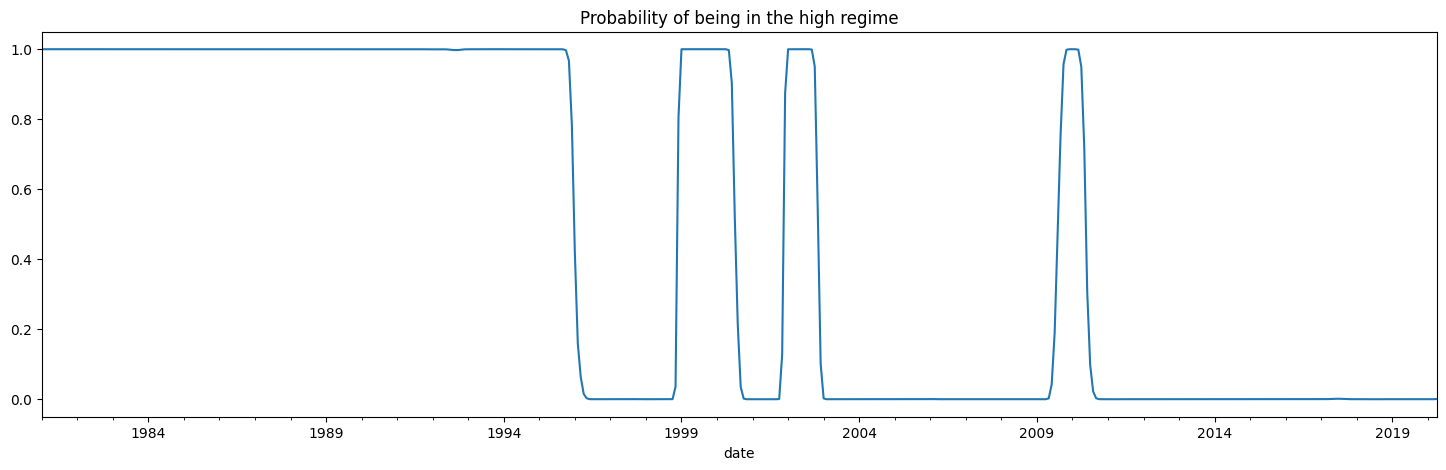

In [ ]:
# 국면 잘 나눠졌나 확인
msdr_model_results_1.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in the high regime', figsize=(18,5));

In [ ]:
# 보다 명확하게 국면을 나누기 위해 추가적인 함수작업
def conditions_regime_2(row):
    if (row[1] >= 0.5):
        regime = 1
    elif (row[1] < 0.5):
        regime = 0
    else:
        regime = 'NA'
    return regime

In [ ]:
# 원본 데이터 오염을 막기 위해 사본 만들기
monthly_return_regime = monthly_return.copy()

In [ ]:
# 라벨링
monthly_return_regime['SKLILI_regime'] = msdr_model_results_1.smoothed_marginal_probabilities.apply(conditions_regime_2, axis=1)
monthly_return_regime

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,SKLILI_regime
date,,,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,NaN,0.260,0.160,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,NaN,0.570,0.570,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,NaN,-0.490,-1.230,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,NaN,0.970,1.650,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,NaN,-0.550,-0.320,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,-0.010,-0.033,0.099,-0.032,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,0
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.117,-0.061,-0.411,-0.255,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,0
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,-0.219,-0.037,-0.378,-0.440,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,0


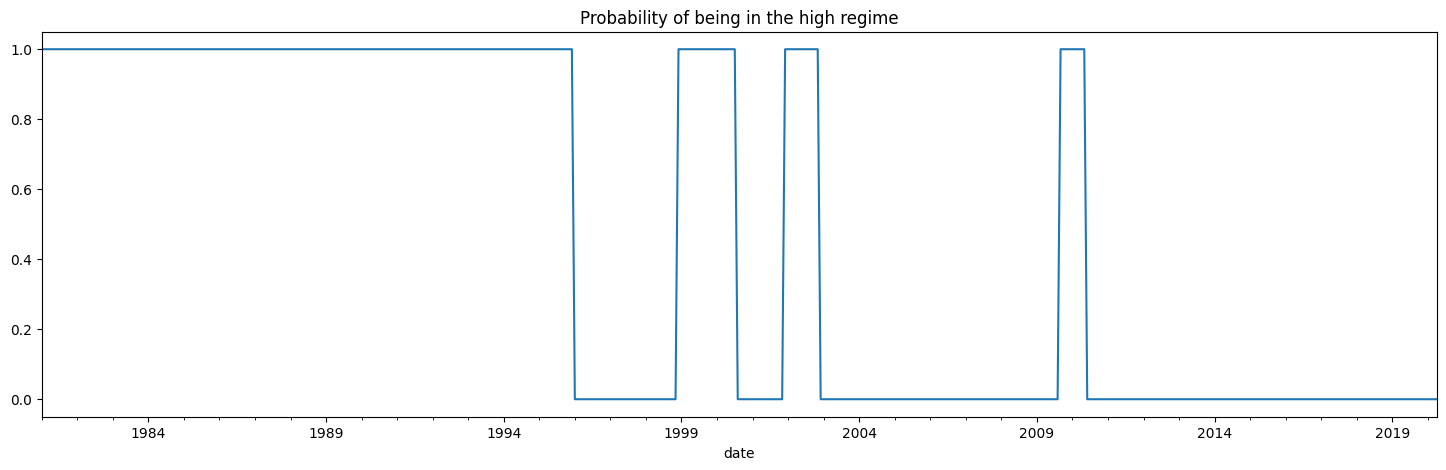

In [ ]:
monthly_return_regime['SKLILI_regime'].plot(
    title='Probability of being in the high regime', figsize=(18,5));

In [ ]:
# 연속해서 True 값을 가지는 구간의 목록을 튜플 리스트로 생성
range_list = []
prev_val = False
monthly_return_regime['over_ma'] = monthly_return_regime['SKLILI_regime'] > 0
# def highlight(x):
for inx, val in monthly_return_regime['over_ma'].iteritems():
    if prev_val != val:
        if val:
            start = inx
        else:
            range_list.append((start, inx))

    prev_inx = inx
    prev_val = val
range_list

[(Timestamp('1981-01-31 00:00:00', freq='M'),
  Timestamp('1996-01-31 00:00:00', freq='M')),
 (Timestamp('1998-12-31 00:00:00', freq='M'),
  Timestamp('2000-08-31 00:00:00', freq='M')),
 (Timestamp('2001-12-31 00:00:00', freq='M'),
  Timestamp('2002-12-31 00:00:00', freq='M')),
 (Timestamp('2009-09-30 00:00:00', freq='M'),
  Timestamp('2010-06-30 00:00:00', freq='M'))]

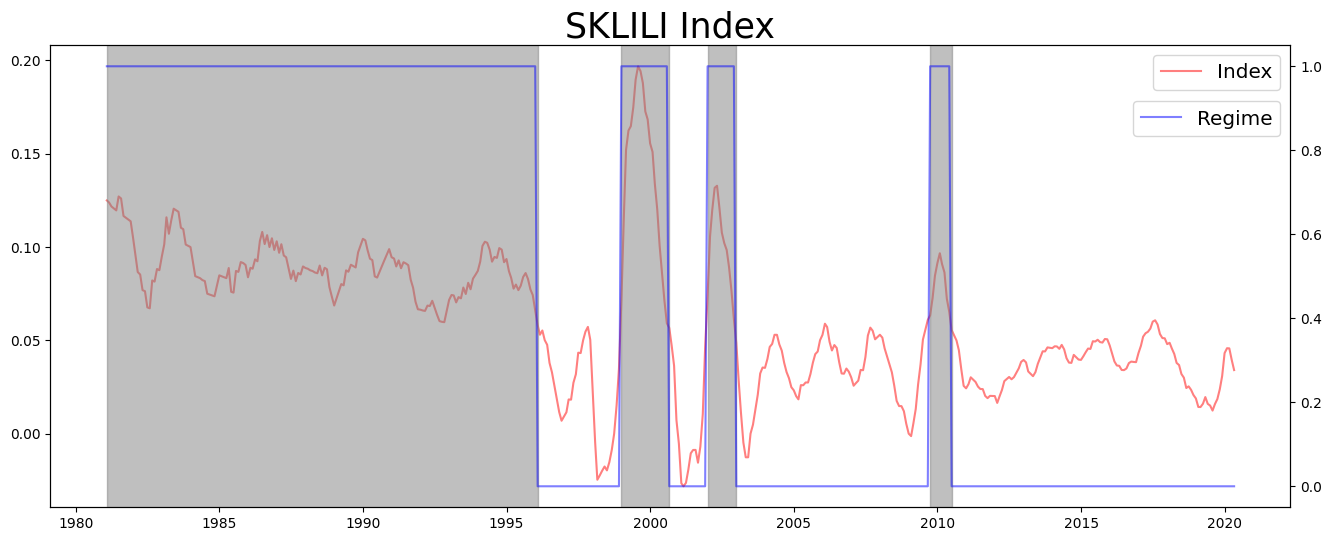

In [ ]:
x = monthly_return_regime.index

y1 = monthly_return_regime['TK_SKLILI Index']
y2 = monthly_return_regime['SKLILI_regime']
# 다중 플롯을 지정 : ax1은 y1에 대한 그래프
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color = 'red', alpha = 0.5)
plt.legend(['Index'], fontsize="x-large")

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = ax1.twinx()
ax2.plot(x, y2, color = 'blue', alpha = 0.5)
plt.legend(['Regime'], fontsize="x-large", bbox_to_anchor=(1, 0.9))
for (start, end) in range_list: # 국면 강조
    plt.axvspan(start, end, color='gray', alpha=0.5)
plt.title("SKLILI Index", fontsize=25)
plt.show()

### 한국소비자물가지수

In [ ]:
msdr_model_2 = sm.tsa.MarkovRegression(monthly_return['TK_KOCPI Index'], k_regimes=2, trend='c', switching_variance=True)

msdr_model_results_2 = msdr_model_2.fit()
print(msdr_model_results_2.summary())

                        Markov Switching Model Results                        
Dep. Variable:         TK_KOCPI Index   No. Observations:                  472
Model:               MarkovRegression   Log Likelihood                1189.441
Date:                Sat, 28 Oct 2023   AIC                          -2366.883
Time:                        07:09:41   BIC                          -2341.941
Sample:                    01-31-1981   HQIC                         -2357.072
                         - 04-30-2020                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0227      0.001     29.752      0.000       0.021       0.024
sigma2         0.0001   1.27e-05     10.086      0.0

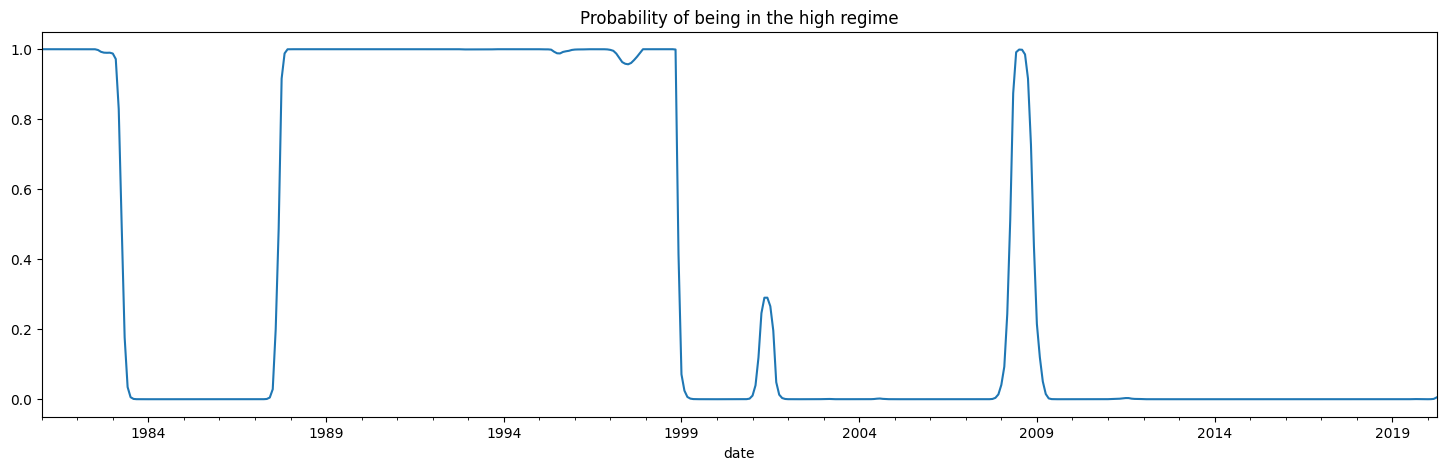

In [ ]:
# 국면 잘 나눠졌나 확인
msdr_model_results_2.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in the high regime', figsize=(18,5));

In [ ]:
# 라벨링
monthly_return_regime['KOCPI_regime'] = msdr_model_results_2.smoothed_marginal_probabilities.apply(conditions_regime_2, axis=1)
monthly_return_regime

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,...,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,SKLILI_regime,over_ma,KOCPI_regime
date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,NaN,0.260,0.160,NaN,0.287610,...,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,True,1
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,NaN,0.570,0.570,NaN,0.244047,...,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,True,1
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,NaN,-0.490,-1.230,NaN,0.222593,...,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,True,1
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,NaN,0.970,1.650,NaN,0.224144,...,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,True,1
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,NaN,-0.550,-0.320,NaN,0.213219,...,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,-0.010,-0.033,0.099,-0.032,0.062488,0.007379,...,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,0,False,0
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.117,-0.061,-0.411,-0.255,-0.109027,0.014870,...,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,0,False,0
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,-0.219,-0.037,-0.378,-0.440,0.015556,0.010603,...,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,0,False,0


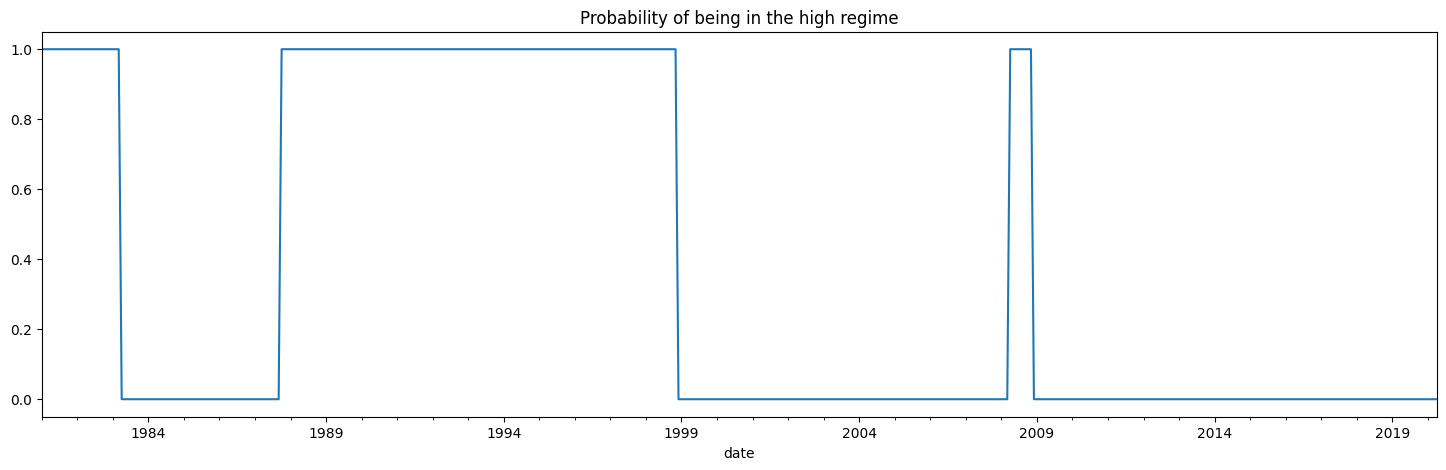

In [ ]:
monthly_return_regime['KOCPI_regime'].plot(
    title='Probability of being in the high regime', figsize=(18,5));

In [ ]:
# 연속해서 True 값을 가지는 구간의 목록을 튜플 리스트로 생성
range_list_1 = []
prev_val_1 = False
monthly_return_regime['over_ma'] = monthly_return_regime['KOCPI_regime'] > 0
# def highlight(x):
for inx, val in monthly_return_regime['over_ma'].iteritems():
    if prev_val_1 != val:
        if val:
            start = inx
        else:
            range_list_1.append((start, inx))

    prev_inx_1 = inx
    prev_val_1 = val
range_list_1

[(Timestamp('1981-01-31 00:00:00', freq='M'),
  Timestamp('1983-04-30 00:00:00', freq='M')),
 (Timestamp('1987-10-31 00:00:00', freq='M'),
  Timestamp('1998-12-31 00:00:00', freq='M')),
 (Timestamp('2008-04-30 00:00:00', freq='M'),
  Timestamp('2008-12-31 00:00:00', freq='M'))]

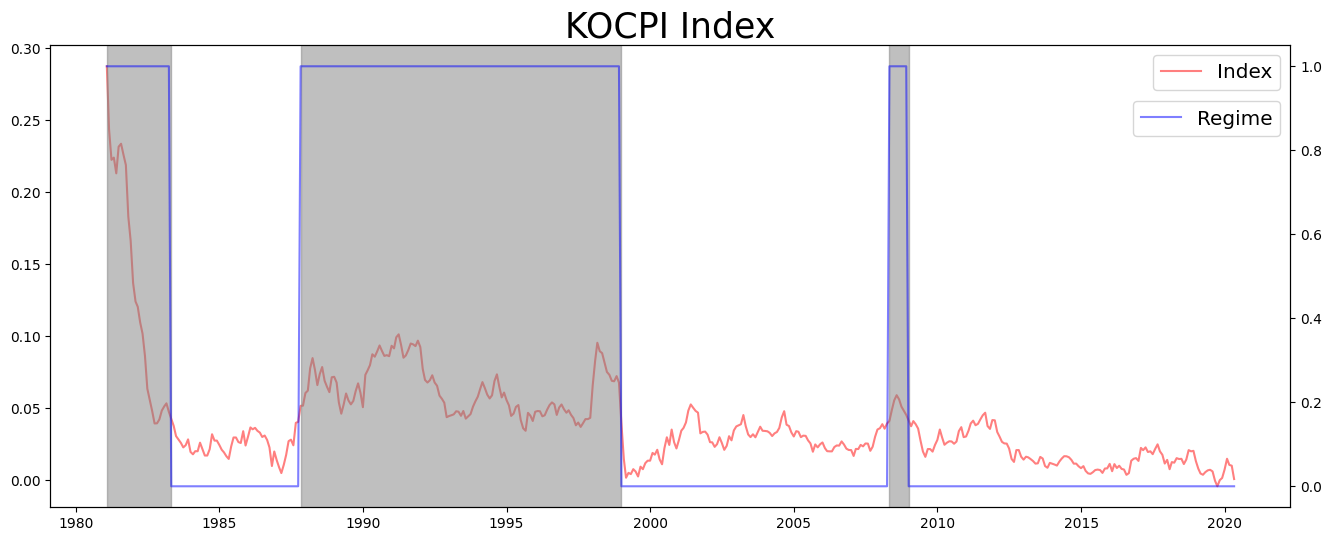

In [ ]:
x = monthly_return_regime.index

y1 = monthly_return_regime['TK_KOCPI Index']
y2 = monthly_return_regime['KOCPI_regime']
# 다중 플롯을 지정 : ax1은 y1에 대한 그래프
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color = 'red', alpha = 0.5)
plt.legend(['Index'], fontsize="x-large")

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = ax1.twinx()
ax2.plot(x, y2, color = 'blue', alpha = 0.5)
plt.legend(['Regime'], fontsize="x-large", bbox_to_anchor=(1, 0.9))
for (start, end) in range_list_1: # 국면 강조
    plt.axvspan(start, end, color='gray', alpha=0.5)
plt.title("KOCPI Index", fontsize=25)
plt.show()

### 합쳐서 4국면 분할

In [ ]:
def conditions_m_regime_4(row):
    if (row['SKLILI_regime'] >= 0.5)  & (row['KOCPI_regime'] >= 0.5):
        regime = 1
    elif (row['SKLILI_regime'] >= 0.5)  & (row['KOCPI_regime'] < 0.5):
        regime = 2
    elif (row['SKLILI_regime'] < 0.5)  & (row['KOCPI_regime'] >= 0.5):
        regime = 3
    elif (row['SKLILI_regime'] < 0.5)  & (row['KOCPI_regime'] < 0.5):
        regime = 4
    else:
        regime = 'NA'
    return regime

In [ ]:
monthly_return_regime['국면'] = monthly_return_regime.apply(conditions_m_regime_4, axis=1)
monthly_return_regime

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,...,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,SKLILI_regime,over_ma,KOCPI_regime,국면
date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,NaN,0.260,0.160,NaN,0.287610,...,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,True,1,1
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,NaN,0.570,0.570,NaN,0.244047,...,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,True,1,1
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,NaN,-0.490,-1.230,NaN,0.222593,...,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,True,1,1
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,NaN,0.970,1.650,NaN,0.224144,...,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,True,1,1
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,NaN,-0.550,-0.320,NaN,0.213219,...,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,-0.010,-0.033,0.099,-0.032,0.062488,0.007379,...,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,0,False,0,4
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.117,-0.061,-0.411,-0.255,-0.109027,0.014870,...,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,0,False,0,4
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,-0.219,-0.037,-0.378,-0.440,0.015556,0.010603,...,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,0,False,0,4


In [ ]:
# column 정리
monthly_return_regime.drop(columns=['SKLILI_regime', 'KOCPI_regime', 'over_ma'], inplace=True)
monthly_return_regime

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면
date,,,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,NaN,0.260,0.160,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,NaN,0.570,0.570,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,NaN,-0.490,-1.230,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,NaN,0.970,1.650,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,NaN,-0.550,-0.320,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,-0.010,-0.033,0.099,-0.032,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,4
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.117,-0.061,-0.411,-0.255,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,4
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,-0.219,-0.037,-0.378,-0.440,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,4


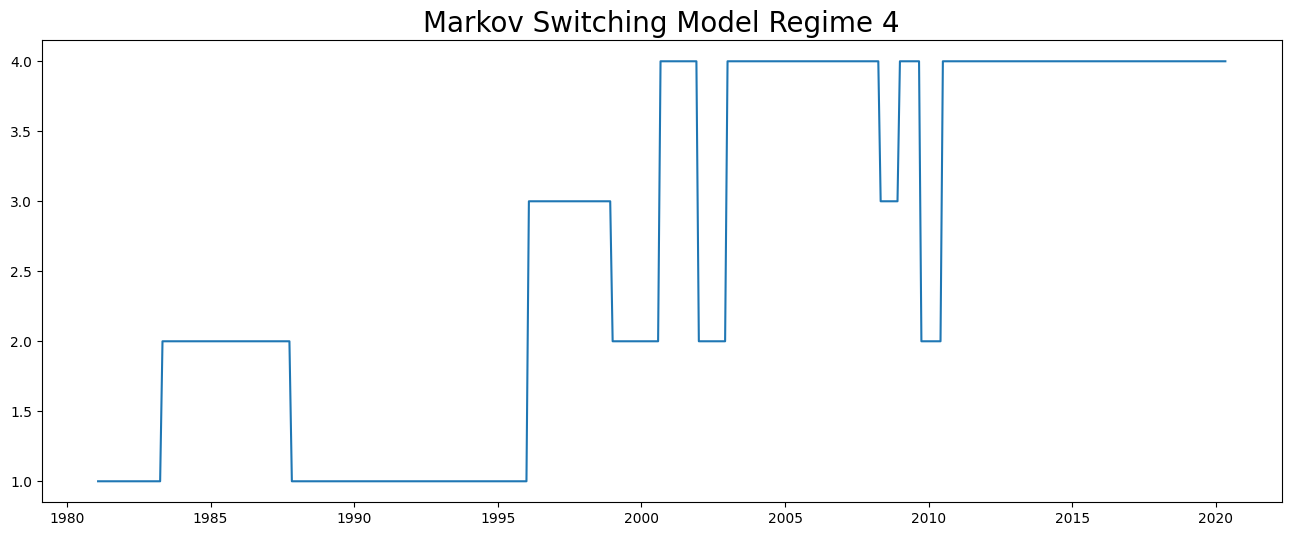

In [ ]:
plt.plot(monthly_return_regime['국면'])
plt.title('Markov Switching Model Regime 4', fontsize=20)
plt.show()

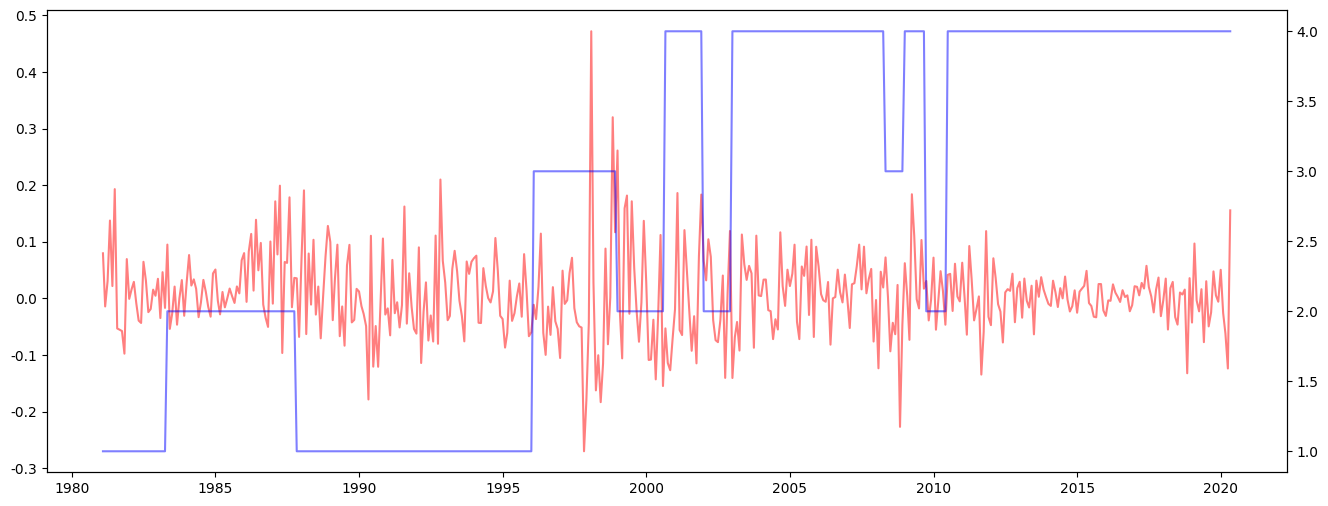

In [ ]:
# 코스피랑 비교
x = monthly_return_regime.index

y1 = monthly_return_regime['TK_KOSPI Index']
y2 = monthly_return_regime['국면']
# 다중 플롯을 지정 : ax1은 y1에 대한 그래프
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color = 'red', alpha = 0.5)

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = ax1.twinx()
ax2.plot(x, y2, color = 'blue', alpha = 0.5)
plt.show()
# 해당 자료의 경우 의미도출이 잘 안 되는데, '누적수익률.ipynb'파일에 코스피 원본 데이터에 국면 적용시킨 자료가 있습니다.

In [ ]:
# 복붙하기 쉽게 컬럼 뽑기
monthly_return_bond.columns

Index(['TK_CL1 Comdty', 'TK_DAX Index', 'TK_DXY Curncy', 'TK_GC1 Comdty',
       'TK_GTKRW10Y Corp', 'TK_GTKRW2Y Corp', 'TK_GTUSD10Y Govt',
       'TK_GTUSD2Y Govt', 'TK_HG1 Comdty', 'TK_KOCPI Index',
       'TK_KOCPIYOY Index', 'TK_KOSPI Index', 'TK_LT12TRUU Index',
       'TK_LUTLTRUU Index', 'TK_NKY Index', 'TK_S 1 Comdty', 'TK_SKLILI Index',
       'TK_SPX Index', 'TK_USDJPY BGN Curncy', 'TK_USDKRW BGN Curncy',
       'TK_XAU Index'],
      dtype='object', name='ticker1')

In [ ]:
monthly_return_regime['TK_LT12TRUU Index'] = monthly_return_bond['TK_LT12TRUU Index']
monthly_return_regime['TK_LUTLTRUU Index'] = monthly_return_bond['TK_LUTLTRUU Index']
monthly_return_regime

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_GTKRW10Y Corp,TK_GTKRW2Y Corp,TK_GTUSD10Y Govt,TK_GTUSD2Y Govt,TK_HG1 Comdty,TK_KOCPI Index,...,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,NaN,0.260,0.160,NaN,0.287610,...,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,NaN,0.570,0.570,NaN,0.244047,...,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,NaN,-0.490,-1.230,NaN,0.222593,...,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,NaN,0.970,1.650,NaN,0.224144,...,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,NaN,-0.550,-0.320,NaN,0.213219,...,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,-0.010,-0.033,0.099,-0.032,0.062488,0.007379,...,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,4,0.001530,-0.006722
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.117,-0.061,-0.411,-0.255,-0.109027,0.014870,...,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,4,0.001528,0.064396
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,-0.219,-0.037,-0.378,-0.440,0.015556,0.010603,...,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,4,0.002724,0.068340


In [ ]:
# 기존 채권 data drop
monthly_return_regime.drop(columns=['TK_GTKRW10Y Corp', 'TK_GTKRW2Y Corp', 'TK_GTUSD10Y Govt', 'TK_GTUSD2Y Govt'], inplace=True)
monthly_return_regime

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,4,0.001530,-0.006722
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,4,0.001528,0.064396
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,4,0.002724,0.068340


In [ ]:
# 위에서 구한 채권 마지막 결측치 채우는 작업
monthly_return_regime['TK_LT12TRUU Index'].iloc[-1] = monthly_return_bond_last['TK_LT12TRUU Index'].iloc[-1]
monthly_return_regime['TK_LUTLTRUU Index'].iloc[-1] = monthly_return_bond_last['TK_LUTLTRUU Index'].iloc[-1]
monthly_return_regime

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,4,0.001530,-0.006722
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,4,0.001528,0.064396
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,4,0.002724,0.068340


In [ ]:
# csv파일로 저장
monthly_return_regime.to_csv(
    path_or_buf = '/content/drive/MyDrive/project/df_monthly_return(regime).csv',
    index = True,
    sep = ',',      # 구분기호 설정
    encoding = 'utf-8',
    float_format='%f',     # 숫자 자리수 모두 표시
)

## 누적 수익률 구하기

In [ ]:
monthly_return_regime= pd.read_csv('df_monthly_return(regime).csv', index_col='date', parse_dates=True)
monthly_return_regime

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,4,0.001530,-0.006722
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,4,0.001528,0.064396
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,4,0.002724,0.068340


In [ ]:
monthly_return_regime

,경질 원유 선물,독일 DAX 30지수,달러인덱스,금 선물,구리 선물,한국소비자물가지수,코스피지수,닛케이 225지수,대두 선물,한국종합선행지수,S&P 500지수,USDJPY 현물환율(기준통화USD),USDKRW 현물환율(기준통화USD),필라델피아 금은지수,국면,US 국고단기채,US 국고장기채
date,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,4,0.001530,-0.006722
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,4,0.001528,0.064396
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,4,0.002724,0.068340


In [ ]:
# 전체
return_acc = (1+monthly_return_regime.drop(columns=['국면','TK_KOCPI Index','TK_SKLILI Index'])).cumprod()-1
return_acc

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.079673,0.014412,-0.107626,-0.049802,0.017725,NaN,NaN,NaN,-0.039098
1981-02-28,NaN,-0.040229,0.077118,-0.148219,NaN,0.064336,-0.009906,-0.103368,-0.017158,0.050538,NaN,NaN,NaN,-0.009459
1981-03-31,NaN,-0.019764,0.064032,-0.058828,NaN,0.097022,0.014824,-0.006348,0.012548,0.051285,NaN,NaN,NaN,-0.061879
1981-04-30,NaN,0.017515,0.110116,-0.109111,NaN,0.247913,0.053851,-0.001216,-0.015329,0.068015,0.005182,NaN,NaN,-0.001419
1981-05-31,NaN,0.004004,0.161814,-0.138928,NaN,0.275174,0.048854,-0.017279,-0.016294,0.108359,0.012282,NaN,NaN,-0.022703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.930511,7.618876,-0.014416,2.416879,2.383446,5.094007,1.345521,-0.113318,9.989751,-0.515657,1.029597,-0.271319,1.730321,31.534416
2020-01-31,0.626956,7.358776,-0.004759,2.539415,2.014559,4.936665,1.345554,-0.180693,9.880688,-0.517483,1.094611,-0.288902,1.734493,33.629502
2020-02-29,0.453254,6.618807,-0.001380,2.515853,2.061454,4.567191,1.158806,-0.174620,8.893734,-0.521034,1.129354,-0.349748,1.741942,35.996082


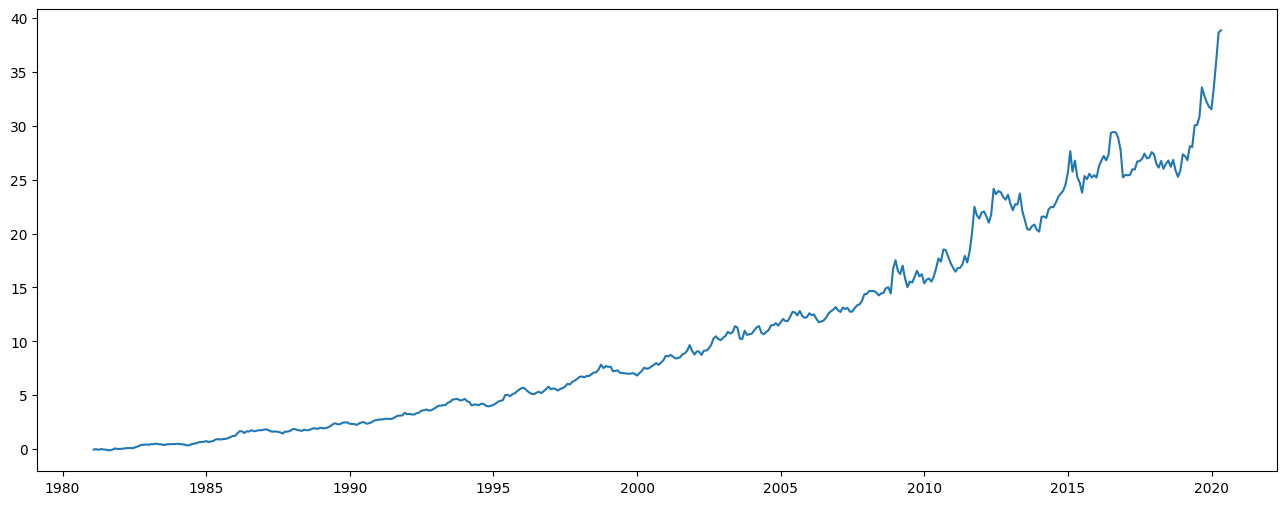

In [ ]:
plt.plot(return_acc['TK_LUTLTRUU Index']) # 수익률 이상해서 보니까 맞는 것 같음

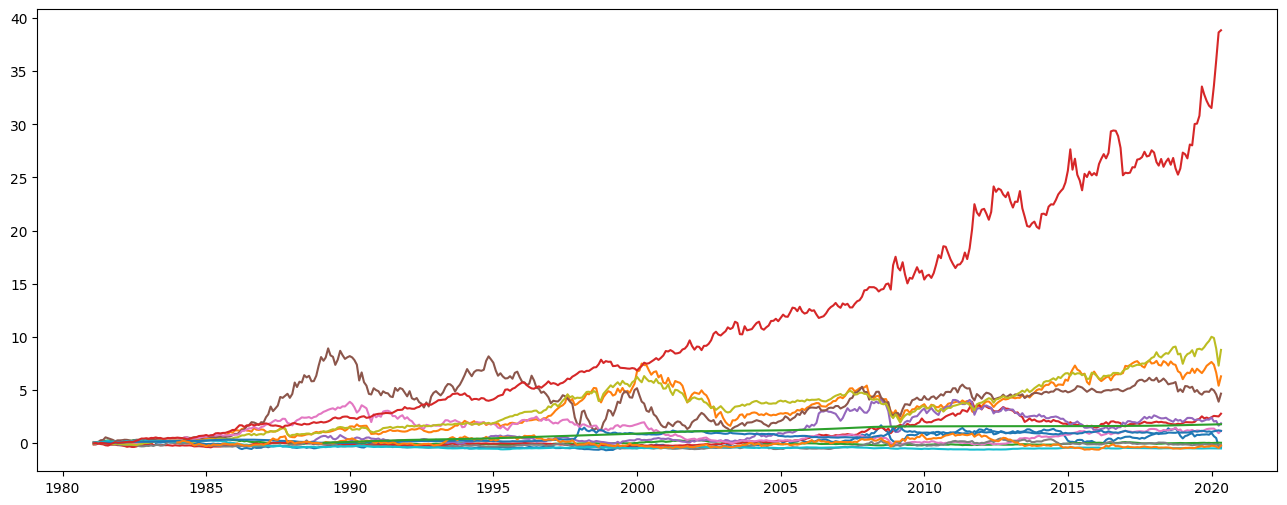

In [ ]:
plt.plot(return_acc)

In [ ]:
# 국면 분할
first = monthly_return_regime[monthly_return_regime['국면']==1].drop(columns='국면')
second = monthly_return_regime[monthly_return_regime['국면']==2].drop(columns='국면')
third = monthly_return_regime[monthly_return_regime['국면']==3].drop(columns='국면')
fourth = monthly_return_regime[monthly_return_regime['국면']==4].drop(columns='국면')

In [ ]:
monthly_return_regime.columns = ['경질 원유 선물', '독일 DAX 30지수', '달러인덱스', '금 선물',
       '구리 선물', '한국소비자물가지수', '코스피지수', '닛케이 225지수',
       '대두 선물', '한국종합선행지수', 'S&P 500지수',
       'USDJPY 현물환율(기준통화USD)', 'USDKRW 현물환율(기준통화USD)', '필라델피아 금은지수', '국면',
       'US 국고단기채', 'US 국고장기채']

In [ ]:
# 1국면 누적 수익률
return_acc1 = (1+first.drop(columns=['한국소비자물가지수','한국종합선행지수'])).cumprod()-1
return_acc1

,경질 원유 선물,독일 DAX 30지수,달러인덱스,금 선물,구리 선물,코스피지수,닛케이 225지수,대두 선물,S&P 500지수,USDJPY 현물환율(기준통화USD),USDKRW 현물환율(기준통화USD),필라델피아 금은지수,US 국고단기채,US 국고장기채
date,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.079673,0.014412,-0.107626,-0.049802,0.017725,NaN,NaN,NaN,-0.039098
1981-02-28,NaN,-0.040229,0.077118,-0.148219,NaN,0.064336,-0.009906,-0.103368,-0.017158,0.050538,NaN,NaN,NaN,-0.009459
1981-03-31,NaN,-0.019764,0.064032,-0.058828,NaN,0.097022,0.014824,-0.006348,0.012548,0.051285,NaN,NaN,NaN,-0.061879
1981-04-30,NaN,0.017515,0.110116,-0.109111,NaN,0.247913,0.053851,-0.001216,-0.015329,0.068015,0.005182,NaN,NaN,-0.001419
1981-05-31,NaN,0.004004,0.161814,-0.138928,NaN,0.275174,0.048854,-0.017279,-0.016294,0.108359,0.012282,NaN,NaN,-0.022703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995-08-31,-0.198059,0.501873,0.129041,-0.239468,0.628470,0.685743,0.021837,-0.265244,0.642536,-0.238812,0.100318,-0.088423,0.492798,2.510065
1995-09-30,-0.220285,0.474089,0.113453,-0.236084,0.607107,0.817609,0.010127,-0.231644,0.702459,-0.220923,0.090206,-0.067859,0.500248,2.562460
1995-10-31,-0.220285,0.453121,0.105131,-0.231886,0.541611,0.844562,0.005275,-0.185826,0.701815,-0.208423,0.086075,-0.183701,0.507499,2.675375


Text(0.5, 1.0, '1국면 Best&Worst 자산비교')

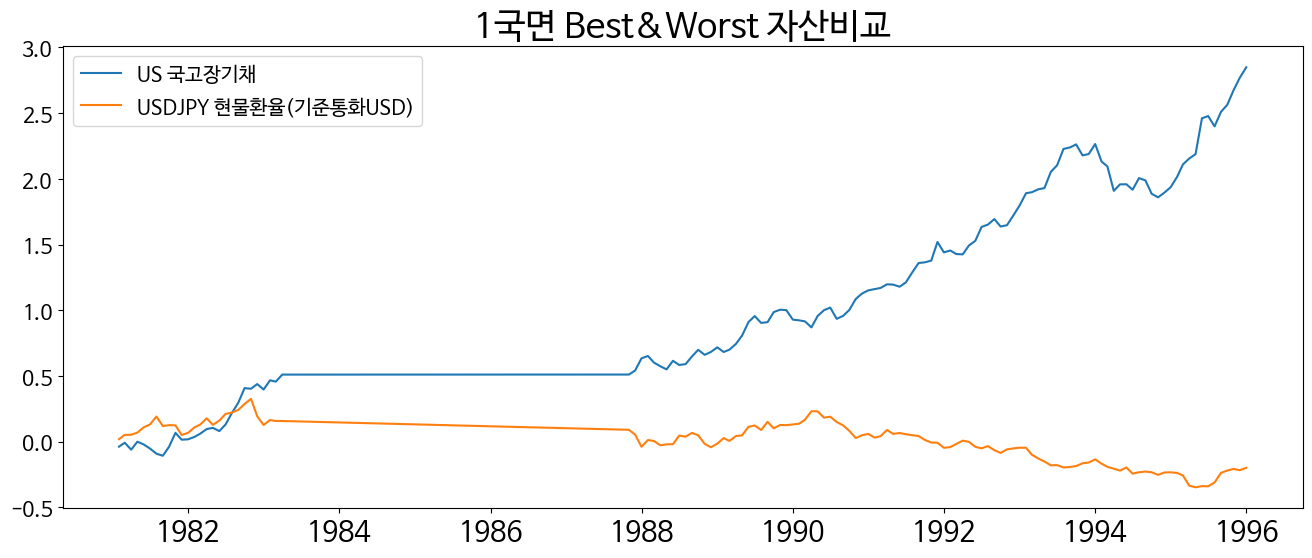

In [ ]:
plt.plot(return_acc1[['US 국고장기채', 'USDJPY 현물환율(기준통화USD)']])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=15)
plt.legend(['US 국고장기채', 'USDJPY 현물환율(기준통화USD)'], fontsize="x-large")#, bbox_to_anchor=(0.17, 1))
plt.title("1국면 Best&Worst 자산비교", fontsize=25)

In [ ]:
# 2국면 누적 수익률
return_acc2 = (1+second.drop(columns=['한국소비자물가지수','한국종합선행지수'])).cumprod()-1
return_acc2

,경질 원유 선물,독일 DAX 30지수,달러인덱스,금 선물,구리 선물,코스피지수,닛케이 225지수,대두 선물,S&P 500지수,USDJPY 현물환율(기준통화USD),USDKRW 현물환율(기준통화USD),필라델피아 금은지수,US 국고단기채,US 국고장기채
date,,,,,,,,,,,,,,
1983-04-30,0.040421,0.061243,0.000981,0.014035,NaN,0.095060,0.019785,-0.004277,0.074500,-0.005426,0.004715,NaN,NaN,-0.036397
1983-05-31,0.028185,0.020758,0.015335,-0.033582,NaN,0.036150,0.009614,-0.049271,0.076356,-0.000194,0.009430,NaN,NaN,-0.031592
1983-06-30,0.063779,0.105885,0.017452,-0.003092,NaN,0.008155,0.047549,-0.051618,0.113172,-0.002569,0.016096,NaN,NaN,-0.081096
1983-07-31,0.085836,0.116632,0.045619,-0.022973,NaN,0.029227,0.064323,0.085530,0.071324,0.008275,0.022110,NaN,NaN,-0.075144
1983-08-31,0.067918,0.062474,0.054972,-0.010416,NaN,-0.018517,0.084847,0.340336,0.086927,0.019652,0.029930,NaN,NaN,-0.029557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-01-31,0.994634,0.904452,-0.157825,0.524916,0.518164,3.947290,1.130252,-0.261086,1.204169,-0.468219,-0.153686,0.056199,0.111015,0.895898
2010-02-28,1.134791,0.885584,-0.145921,0.545076,0.609249,3.910764,1.113764,-0.227582,1.235131,-0.477844,-0.160633,0.091782,0.111102,0.907708
2010-03-31,1.272047,1.030806,-0.141527,0.538168,0.715712,4.147099,1.304500,-0.236908,1.342750,-0.452419,-0.177251,0.099565,0.111102,0.873958


Text(0.5, 1.0, '2국면 Best&Worst 자산비교')

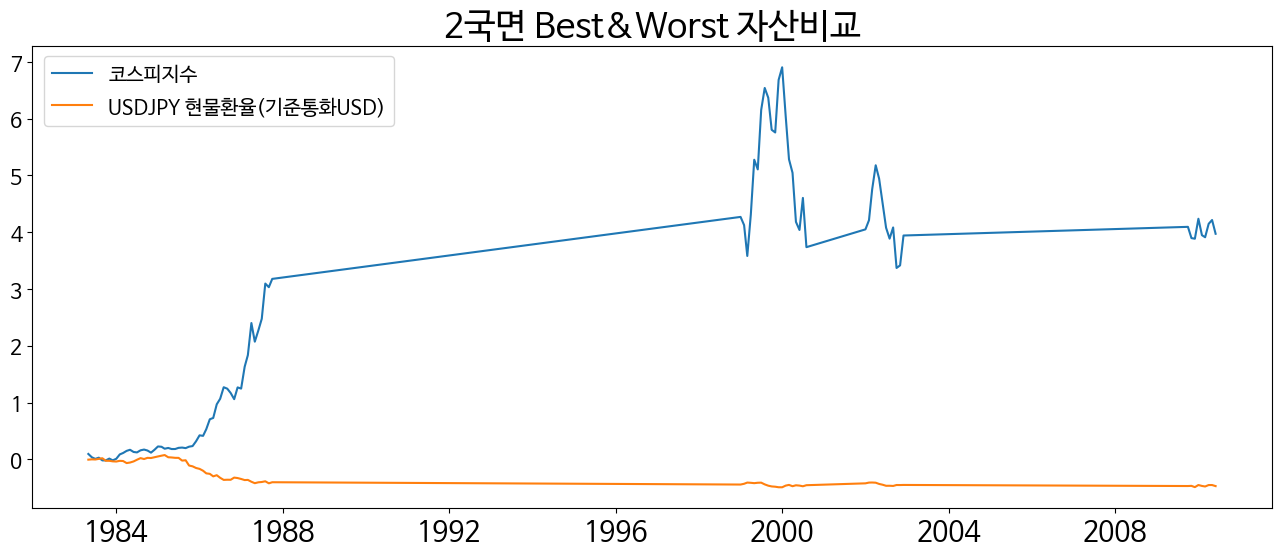

In [ ]:
plt.plot(return_acc2[['코스피지수', 'USDJPY 현물환율(기준통화USD)']])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=15)
plt.legend(['코스피지수', 'USDJPY 현물환율(기준통화USD)'], fontsize="x-large", bbox_to_anchor=(0.3, 1))
plt.title("2국면 Best&Worst 자산비교", fontsize=25)

In [ ]:
# 3국면 누적 수익률
return_acc3 = (1+third.drop(columns=['한국소비자물가지수','한국종합선행지수'])).cumprod()-1
return_acc3

,경질 원유 선물,독일 DAX 30지수,달러인덱스,금 선물,구리 선물,코스피지수,닛케이 225지수,대두 선물,S&P 500지수,USDJPY 현물환율(기준통화USD),USDKRW 현물환율(기준통화USD),필라델피아 금은지수,US 국고단기채,US 국고장기채
date,,,,,,,,,,,,,,
1996-01-31,-0.104493,0.081090,0.031763,0.034958,-0.027942,-0.011284,0.009445,-0.013026,0.024632,0.034799,0.014282,0.115196,0.003391,-0.004164
1996-02-29,-0.011959,0.087372,0.021467,0.010772,-0.033324,-0.047364,-0.029599,-0.021018,0.027794,0.020160,0.007544,0.091703,0.007238,-0.037343
1996-03-31,0.091216,0.080699,0.021821,-0.000341,-0.046017,-0.027733,0.029976,0.009565,0.029597,0.039346,0.009877,0.101043,0.011411,-0.063965
1996-04-30,0.039253,0.087715,0.037259,-0.004390,0.008949,0.083549,0.052950,0.044389,0.030290,0.015676,0.001547,0.098745,0.015780,-0.082755
1996-05-31,-0.013184,0.105315,0.030800,-0.014475,-0.055906,0.017703,0.059765,0.015718,0.053176,0.041996,0.013427,0.145282,0.020475,-0.087590
1996-06-30,0.040009,0.117779,0.029159,-0.036196,-0.237000,-0.083789,0.106018,0.028987,0.057828,0.054295,0.039486,-0.040351,0.024844,-0.067526
1996-07-31,-0.013610,0.078260,0.007118,-0.024107,-0.205012,-0.097063,0.019200,0.005996,0.001594,0.026803,0.042962,-0.050808,0.029734,-0.053844
1996-08-31,0.043117,0.099601,0.010159,-0.019309,-0.170186,-0.155200,-0.020525,0.051166,0.004630,0.044060,0.051077,-0.049052,0.035082,-0.073448
1996-09-30,0.086803,0.151249,0.027214,-0.044111,-0.226423,-0.138386,0.050073,-0.017529,0.054638,0.065389,0.052808,-0.135311,0.040494,-0.047250


Text(0.5, 1.0, '3국면 Best&Worst 자산비교')

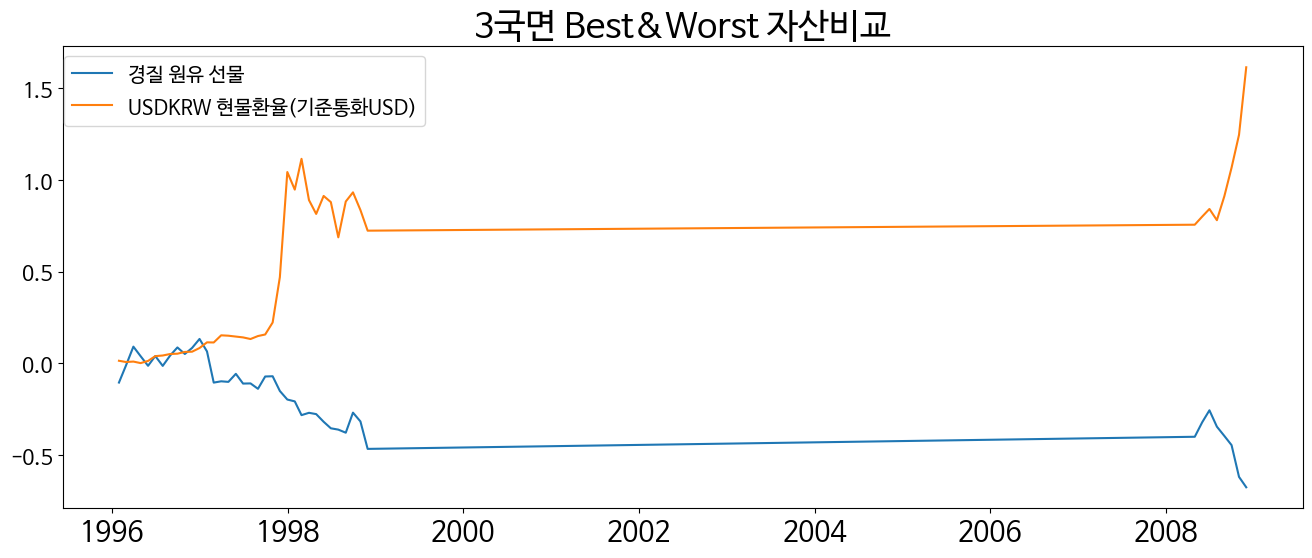

In [ ]:
plt.plot(return_acc3[['경질 원유 선물', 'USDKRW 현물환율(기준통화USD)']])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=15)
plt.legend(['경질 원유 선물', 'USDKRW 현물환율(기준통화USD)'], fontsize="x-large", bbox_to_anchor=(0.3, 1))
plt.title("3국면 Best&Worst 자산비교", fontsize=25)

In [ ]:
# 4국면 누적 수익률
return_acc4 = (1+fourth.drop(columns=['한국소비자물가지수','한국종합선행지수'])).cumprod()-1
return_acc4

,경질 원유 선물,독일 DAX 30지수,달러인덱스,금 선물,구리 선물,코스피지수,닛케이 225지수,대두 선물,S&P 500지수,USDJPY 현물환율(기준통화USD),USDKRW 현물환율(기준통화USD),필라델피아 금은지수,US 국고단기채,US 국고장기채
date,,,,,,,,,,,,,,
2000-08-31,0.191796,0.009925,0.018083,0.009751,0.013165,-0.052923,0.047305,0.119344,0.055337,-0.024330,-0.007232,0.010815,0.005599,0.020157
2000-09-30,0.101109,-0.065229,0.034804,-0.007302,0.049064,-0.160972,-0.014791,0.114233,-0.003135,-0.004632,0.001543,-0.045044,0.010992,0.001334
2000-10-31,0.118901,-0.035917,0.060813,-0.031656,-0.009866,-0.267399,-0.099227,0.046514,-0.007876,-0.004541,0.018518,-0.143098,0.015974,0.023819
2000-11-30,0.138083,-0.129708,0.057875,-0.014507,-0.003944,-0.320172,-0.112786,0.144325,-0.082061,0.015798,0.089317,-0.071081,0.021728,0.048642
2000-12-31,-0.047451,-0.140304,0.010205,0.003464,-0.023065,-0.333175,-0.175559,0.125178,-0.078536,0.044275,0.139303,-0.017574,0.029433,0.095967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,2.538366,1.151134,-0.247234,2.658497,3.455641,1.392137,1.048117,1.139857,1.829178,0.014025,-0.185159,0.856639,0.360099,1.843563
2020-01-31,1.981990,1.086217,-0.239858,2.789698,2.969856,1.330375,1.048146,0.977258,1.801101,0.010202,-0.159057,0.811841,0.362177,2.026677
2020-02-29,1.663618,0.901533,-0.237278,2.764470,3.031611,1.185341,0.885077,0.991913,1.547022,0.002767,-0.145108,0.656807,0.365888,2.233521


Text(0.5, 1.0, '4국면 Best&Worst 자산비교')

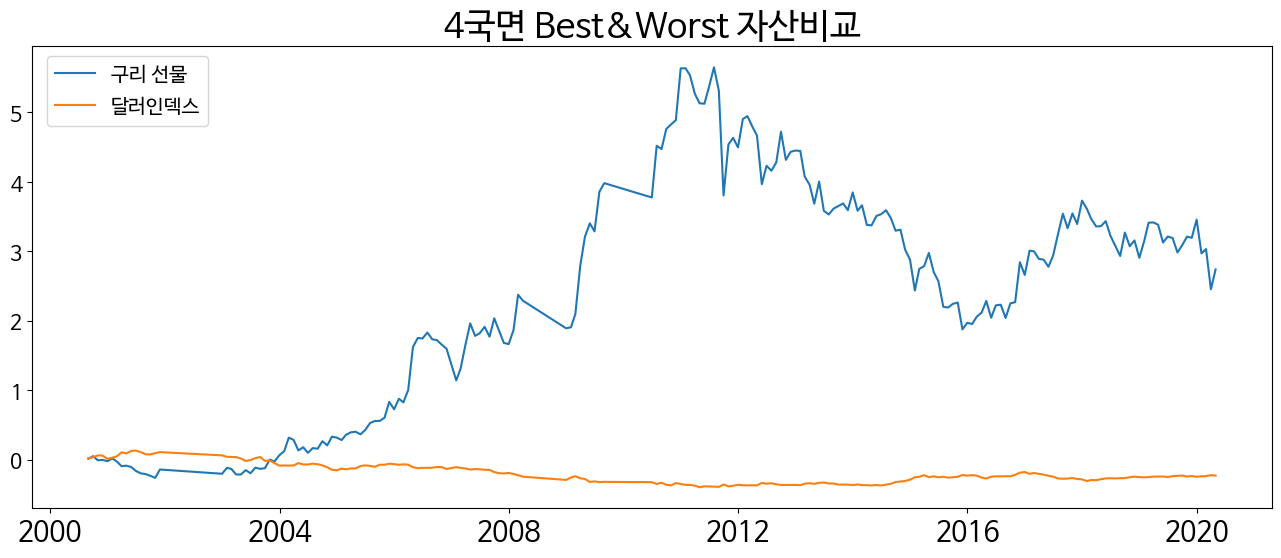

In [ ]:
plt.plot(return_acc4[['구리 선물', '달러인덱스']])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=15)
plt.legend(['구리 선물', '달러인덱스'], fontsize="x-large", bbox_to_anchor=(0.15, 1))
plt.title("4국면 Best&Worst 자산비교", fontsize=25)

### 국면별 바뀌는 날짜 찾는 작업

In [ ]:
def find_first_day(x): # 국면 바뀌는 날짜 찾는 함수(끝나는 날)
    for i in range(0, len(x)-1):
        t = x.index[i+1] - x.index[i]
        if t.days > 31:
            return x.index[i]

In [ ]:
def find_last_day(x): # 국면 바뀌는 날짜 찾는 함수(첫째날)
    for i in range(1, len(x)):
        t = x.index[i] - x.index[i-1]
        if t.days > 31:
            return x.index[i]

In [ ]:
first.index[0]

Timestamp('1981-01-31 00:00:00')

In [ ]:
first.apply(find_first_day, axis=0)

TK_CL1 Comdty          1983-03-31
TK_DAX Index           1983-03-31
TK_DXY Curncy          1983-03-31
TK_GC1 Comdty          1983-03-31
TK_HG1 Comdty          1983-03-31
TK_KOCPI Index         1983-03-31
TK_KOSPI Index         1983-03-31
TK_NKY Index           1983-03-31
TK_S 1 Comdty          1983-03-31
TK_SKLILI Index        1983-03-31
TK_SPX Index           1983-03-31
TK_USDJPY BGN Curncy   1983-03-31
TK_USDKRW BGN Curncy   1983-03-31
TK_XAU Index           1983-03-31
TK_LT12TRUU Index      1983-03-31
TK_LUTLTRUU Index      1983-03-31
dtype: datetime64[ns]

In [ ]:
first.apply(find_last_day, axis=0)

TK_CL1 Comdty          1987-10-31
TK_DAX Index           1987-10-31
TK_DXY Curncy          1987-10-31
TK_GC1 Comdty          1987-10-31
TK_HG1 Comdty          1987-10-31
TK_KOCPI Index         1987-10-31
TK_KOSPI Index         1987-10-31
TK_NKY Index           1987-10-31
TK_S 1 Comdty          1987-10-31
TK_SKLILI Index        1987-10-31
TK_SPX Index           1987-10-31
TK_USDJPY BGN Curncy   1987-10-31
TK_USDKRW BGN Curncy   1987-10-31
TK_XAU Index           1987-10-31
TK_LT12TRUU Index      1987-10-31
TK_LUTLTRUU Index      1987-10-31
dtype: datetime64[ns]

In [ ]:
first.index[-1]

Timestamp('1995-12-31 00:00:00')

In [ ]:
second.index[0]

Timestamp('1983-04-30 00:00:00')

In [ ]:
second.apply(find_first_day, axis=0)

TK_CL1 Comdty          1987-09-30
TK_DAX Index           1987-09-30
TK_DXY Curncy          1987-09-30
TK_GC1 Comdty          1987-09-30
TK_HG1 Comdty          1987-09-30
TK_KOCPI Index         1987-09-30
TK_KOSPI Index         1987-09-30
TK_NKY Index           1987-09-30
TK_S 1 Comdty          1987-09-30
TK_SKLILI Index        1987-09-30
TK_SPX Index           1987-09-30
TK_USDJPY BGN Curncy   1987-09-30
TK_USDKRW BGN Curncy   1987-09-30
TK_XAU Index           1987-09-30
TK_LT12TRUU Index      1987-09-30
TK_LUTLTRUU Index      1987-09-30
dtype: datetime64[ns]

In [ ]:
second.apply(find_last_day, axis=0)

TK_CL1 Comdty          1998-12-31
TK_DAX Index           1998-12-31
TK_DXY Curncy          1998-12-31
TK_GC1 Comdty          1998-12-31
TK_HG1 Comdty          1998-12-31
TK_KOCPI Index         1998-12-31
TK_KOSPI Index         1998-12-31
TK_NKY Index           1998-12-31
TK_S 1 Comdty          1998-12-31
TK_SKLILI Index        1998-12-31
TK_SPX Index           1998-12-31
TK_USDJPY BGN Curncy   1998-12-31
TK_USDKRW BGN Curncy   1998-12-31
TK_XAU Index           1998-12-31
TK_LT12TRUU Index      1998-12-31
TK_LUTLTRUU Index      1998-12-31
dtype: datetime64[ns]

In [ ]:
second.index[-1]

Timestamp('2010-05-31 00:00:00')

In [ ]:
second.index[20:]

DatetimeIndex(['1984-12-31', '1985-01-31', '1985-02-28', '1985-03-31',
               '1985-04-30', '1985-05-31', '1985-06-30', '1985-07-31',
               '1985-08-31', '1985-09-30', '1985-10-31', '1985-11-30',
               '1985-12-31', '1986-01-31', '1986-02-28', '1986-03-31',
               '1986-04-30', '1986-05-31', '1986-06-30', '1986-07-31',
               '1986-08-31', '1986-09-30', '1986-10-31', '1986-11-30',
               '1986-12-31', '1987-01-31', '1987-02-28', '1987-03-31',
               '1987-04-30', '1987-05-31', '1987-06-30', '1987-07-31',
               '1987-08-31', '1987-09-30', '1998-12-31', '1999-01-31',
               '1999-02-28', '1999-03-31', '1999-04-30', '1999-05-31',
               '1999-06-30', '1999-07-31', '1999-08-31', '1999-09-30',
               '1999-10-31', '1999-11-30', '1999-12-31', '2000-01-31',
               '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
               '2000-06-30', '2000-07-31', '2001-12-31', '2002-01-31',
      

In [ ]:
third.index[10:]

DatetimeIndex(['1996-11-30', '1996-12-31', '1997-01-31', '1997-02-28',
               '1997-03-31', '1997-04-30', '1997-05-31', '1997-06-30',
               '1997-07-31', '1997-08-31', '1997-09-30', '1997-10-31',
               '1997-11-30', '1997-12-31', '1998-01-31', '1998-02-28',
               '1998-03-31', '1998-04-30', '1998-05-31', '1998-06-30',
               '1998-07-31', '1998-08-31', '1998-09-30', '1998-10-31',
               '1998-11-30', '2008-04-30', '2008-05-31', '2008-06-30',
               '2008-07-31', '2008-08-31', '2008-09-30', '2008-10-31',
               '2008-11-30'],
              dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
fourth.index[60:110]

DatetimeIndex(['2006-08-31', '2006-09-30', '2006-10-31', '2006-11-30',
               '2006-12-31', '2007-01-31', '2007-02-28', '2007-03-31',
               '2007-04-30', '2007-05-31', '2007-06-30', '2007-07-31',
               '2007-08-31', '2007-09-30', '2007-10-31', '2007-11-30',
               '2007-12-31', '2008-01-31', '2008-02-29', '2008-03-31',
               '2008-12-31', '2009-01-31', '2009-02-28', '2009-03-31',
               '2009-04-30', '2009-05-31', '2009-06-30', '2009-07-31',
               '2009-08-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29'],
              dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
third.index[0]

Timestamp('1996-01-31 00:00:00')

In [ ]:
third.apply(find_first_day, axis=0)

TK_CL1 Comdty          1998-11-30
TK_DAX Index           1998-11-30
TK_DXY Curncy          1998-11-30
TK_GC1 Comdty          1998-11-30
TK_HG1 Comdty          1998-11-30
TK_KOCPI Index         1998-11-30
TK_KOSPI Index         1998-11-30
TK_NKY Index           1998-11-30
TK_S 1 Comdty          1998-11-30
TK_SKLILI Index        1998-11-30
TK_SPX Index           1998-11-30
TK_USDJPY BGN Curncy   1998-11-30
TK_USDKRW BGN Curncy   1998-11-30
TK_XAU Index           1998-11-30
TK_LT12TRUU Index      1998-11-30
TK_LUTLTRUU Index      1998-11-30
dtype: datetime64[ns]

In [ ]:
third.index[0]

Timestamp('1996-01-31 00:00:00')

In [ ]:
third.apply(find_last_day, axis=0)

TK_CL1 Comdty          2008-04-30
TK_DAX Index           2008-04-30
TK_DXY Curncy          2008-04-30
TK_GC1 Comdty          2008-04-30
TK_HG1 Comdty          2008-04-30
TK_KOCPI Index         2008-04-30
TK_KOSPI Index         2008-04-30
TK_NKY Index           2008-04-30
TK_S 1 Comdty          2008-04-30
TK_SKLILI Index        2008-04-30
TK_SPX Index           2008-04-30
TK_USDJPY BGN Curncy   2008-04-30
TK_USDKRW BGN Curncy   2008-04-30
TK_XAU Index           2008-04-30
TK_LT12TRUU Index      2008-04-30
TK_LUTLTRUU Index      2008-04-30
dtype: datetime64[ns]

In [ ]:
fourth.index[0]

Timestamp('2000-08-31 00:00:00')

In [ ]:
fourth.apply(find_first_day, axis=0)

TK_CL1 Comdty          2001-11-30
TK_DAX Index           2001-11-30
TK_DXY Curncy          2001-11-30
TK_GC1 Comdty          2001-11-30
TK_HG1 Comdty          2001-11-30
TK_KOCPI Index         2001-11-30
TK_KOSPI Index         2001-11-30
TK_NKY Index           2001-11-30
TK_S 1 Comdty          2001-11-30
TK_SKLILI Index        2001-11-30
TK_SPX Index           2001-11-30
TK_USDJPY BGN Curncy   2001-11-30
TK_USDKRW BGN Curncy   2001-11-30
TK_XAU Index           2001-11-30
TK_LT12TRUU Index      2001-11-30
TK_LUTLTRUU Index      2001-11-30
dtype: datetime64[ns]

In [ ]:
fourth.apply(find_last_day, axis=0)

TK_CL1 Comdty          2002-12-31
TK_DAX Index           2002-12-31
TK_DXY Curncy          2002-12-31
TK_GC1 Comdty          2002-12-31
TK_HG1 Comdty          2002-12-31
TK_KOCPI Index         2002-12-31
TK_KOSPI Index         2002-12-31
TK_NKY Index           2002-12-31
TK_S 1 Comdty          2002-12-31
TK_SKLILI Index        2002-12-31
TK_SPX Index           2002-12-31
TK_USDJPY BGN Curncy   2002-12-31
TK_USDKRW BGN Curncy   2002-12-31
TK_XAU Index           2002-12-31
TK_LT12TRUU Index      2002-12-31
TK_LUTLTRUU Index      2002-12-31
dtype: datetime64[ns]

# EDA

In [ ]:
return_acc_each = monthly_return_regime.copy()
return_acc_each

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,4,0.001530,-0.006722
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,4,0.001528,0.064396
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,4,0.002724,0.068340


In [ ]:
monthly_return_regime.columns = ['경질 원유 선물', '독일 DAX 30지수', '달러인덱스', '금 선물',
       '구리 선물', '한국소비자물가지수', '코스피지수', '닛케이 225지수',
       '대두 선물', '한국종합선행지수', 'S&P 500지수',
       'USDJPY 현물환율(기준통화USD)', 'USDKRW 현물환율(기준통화USD)', '필라델피아 금은지수', '국면',
       'US 국고단기채', 'US 국고장기채']

In [ ]:
monthly_return_regime

,경질 원유 선물,독일 DAX 30지수,달러인덱스,금 선물,구리 선물,한국소비자물가지수,코스피지수,닛케이 225지수,대두 선물,한국종합선행지수,S&P 500지수,USDJPY 현물환율(기준통화USD),USDKRW 현물환율(기준통화USD),필라델피아 금은지수,국면,US 국고단기채,US 국고장기채
date,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,4,0.001530,-0.006722
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,4,0.001528,0.064396
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,4,0.002724,0.068340


In [ ]:
# 구간별 데이터 프레임 뽑기
구간1 = monthly_return_regime.loc[:'1983-03-31']
구간2 = monthly_return_regime.loc['1983-04-30':'1987-09-30']
구간3 = monthly_return_regime.loc['1987-10-31':'1995-12-31']
구간4 = monthly_return_regime.loc['1996-01-31':'1998-11-30']
구간5 = monthly_return_regime.loc['1998-12-31':'2000-07-31']
구간6 = monthly_return_regime.loc['2000-08-31':'2001-11-30']
구간7 = monthly_return_regime.loc['2001-12-31':'2002-11-30']
구간8 = monthly_return_regime.loc['2002-12-31':'2008-03-31']
구간9 = monthly_return_regime.loc['2008-04-30':'2008-11-30']
구간10 = monthly_return_regime.loc['2008-12-31':'2009-08-31']
구간11 = monthly_return_regime.loc['2009-09-30':'2010-05-31']
구간12 = monthly_return_regime.loc['2010-06-30':'2020-04-30']

In [ ]:
x = ['국면', '한국종합선행지수', '한국소비자물가지수']

구간1_누적 = 구간1.apply(f_return_acc,axis=0).drop(columns=x)
구간2_누적 = 구간2.apply(f_return_acc,axis=0).drop(columns=x)
구간3_누적 = 구간3.apply(f_return_acc,axis=0).drop(columns=x)
구간4_누적 = 구간4.apply(f_return_acc,axis=0).drop(columns=x)
구간5_누적 = 구간5.apply(f_return_acc,axis=0).drop(columns=x)
구간6_누적 = 구간6.apply(f_return_acc,axis=0).drop(columns=x)
구간7_누적 = 구간7.apply(f_return_acc,axis=0).drop(columns=x)
구간8_누적 = 구간8.apply(f_return_acc,axis=0).drop(columns=x)
구간9_누적 = 구간9.apply(f_return_acc,axis=0).drop(columns=x)
구간10_누적 = 구간10.apply(f_return_acc,axis=0).drop(columns=x)
구간11_누적 = 구간11.apply(f_return_acc,axis=0).drop(columns=x)
구간12_누적 = 구간12.apply(f_return_acc,axis=0).drop(columns=x)

In [ ]:
구간1_누적.iloc[-1].nlargest(3).index # 전체 데이터 중 누적 수익률 상위자산 3개(마지막날 기준)

Index(['US 국고장기채', '달러인덱스', '코스피지수'], dtype='object')

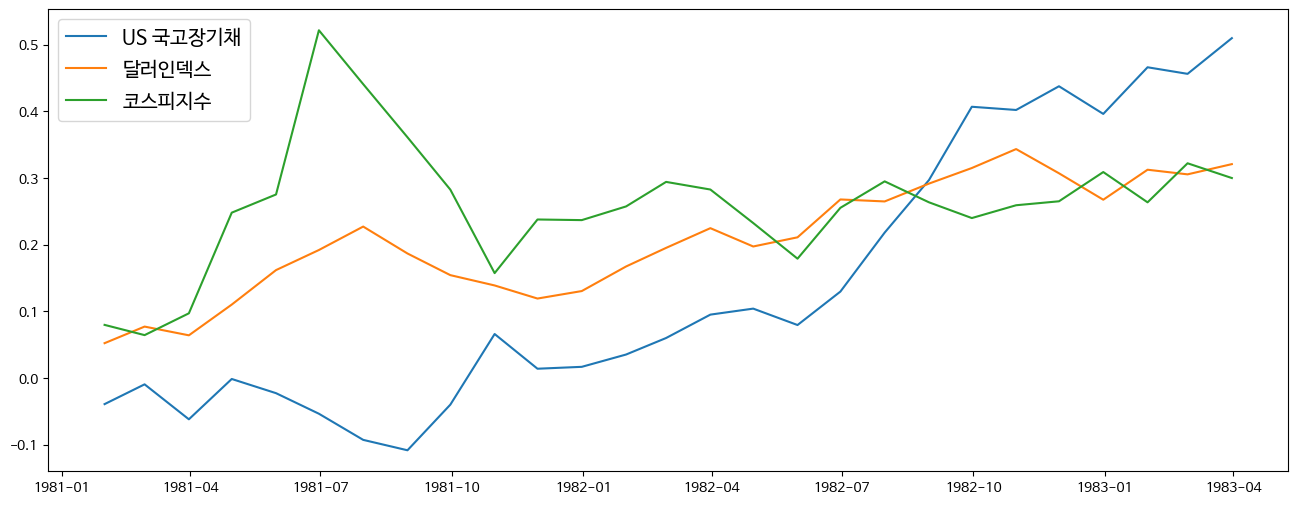

In [ ]:
plt.plot(구간1_누적[['US 국고장기채', '달러인덱스', '코스피지수']])
plt.legend(['US 국고장기채', '달러인덱스', '코스피지수'], fontsize="x-large")

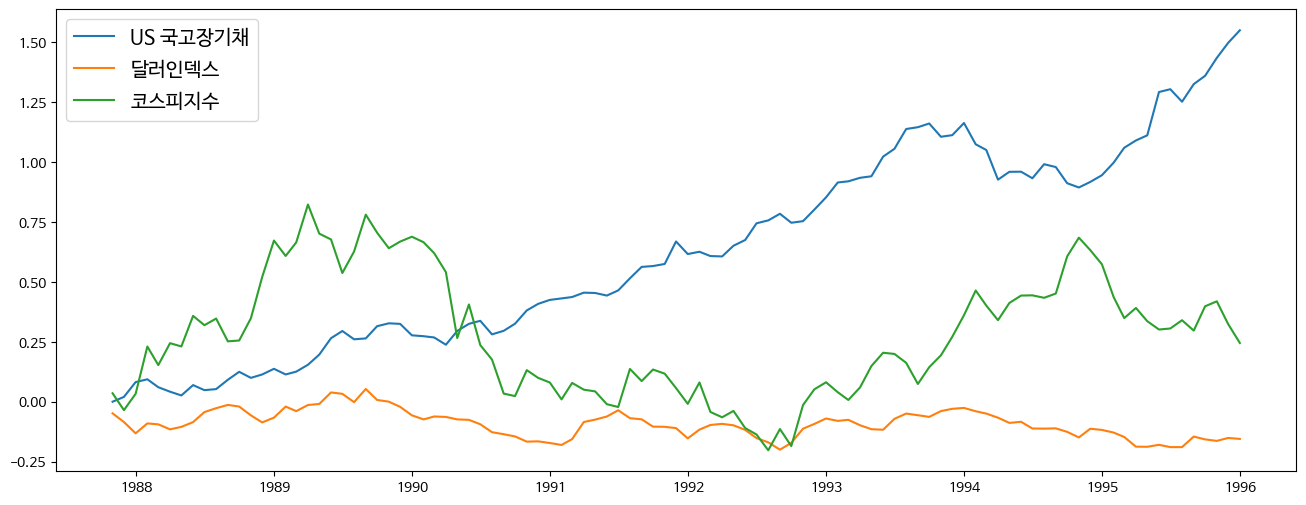

In [ ]:
plt.plot(구간3_누적[['US 국고장기채', '달러인덱스', '코스피지수']])
plt.legend(['US 국고장기채', '달러인덱스', '코스피지수'], fontsize="x-large")

In [ ]:
plt.plot(구간1_누적[['US', 'TK_DXY Curncy', 'TK_KOSPI Index']])
plt.legend(['TK_LUTLTRUU Index', 'TK_DXY Curncy', 'TK_KOSPI Index'], fontsize="x-large")

In [ ]:
# 수익률 하위 3
구간1_누적.iloc[-1].nsmallest(3).index

Index(['금 선물', '대두 선물', '경질 원유 선물'], dtype='object')

In [ ]:
구간3_누적.iloc[-1].nsmallest(3).index

Index(['TK_USDJPY BGN Curncy', 'TK_DXY Curncy', 'TK_CL1 Comdty'], dtype='object')

([<matplotlib.axis.YTick at 0x7ce3f9a57a90>,
 [Text(0, -0.4, '-0.40'),
  Text(0, -0.35, '-0.35'),
  Text(0, -0.3, '-0.30'),
  Text(0, -0.25, '-0.25'),
  Text(0, -0.2, '-0.20'),
  Text(0, -0.15, '-0.15'),
  Text(0, -0.1, '-0.10'),
  Text(0, -0.05, '-0.05'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.3, '0.30'),
  Text(0, 0.35, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50')])

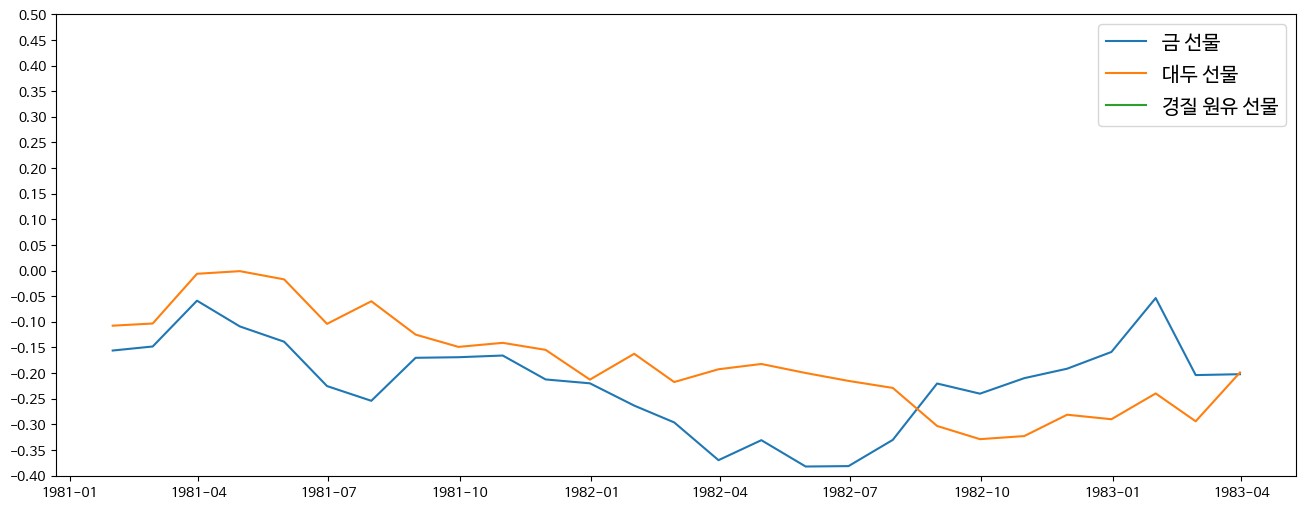

In [ ]:
plt.plot(구간1_누적[['금 선물', '대두 선물', '경질 원유 선물']])
plt.legend(['금 선물', '대두 선물', '경질 원유 선물'], fontsize='x-large')
plt.yticks([-0.40, -0.35 , -0.30, -0.25, -0.20, -0.15, -0.10, -0.05, 0 , 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])

([<matplotlib.axis.YTick at 0x799dfaa29120>,
 [Text(0, -0.4, '-0.40'),
  Text(0, -0.35, '-0.35'),
  Text(0, -0.3, '-0.30'),
  Text(0, -0.25, '-0.25'),
  Text(0, -0.2, '-0.20'),
  Text(0, -0.15, '-0.15'),
  Text(0, -0.1, '-0.10'),
  Text(0, -0.05, '-0.05'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.3, '0.30'),
  Text(0, 0.35, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50')])

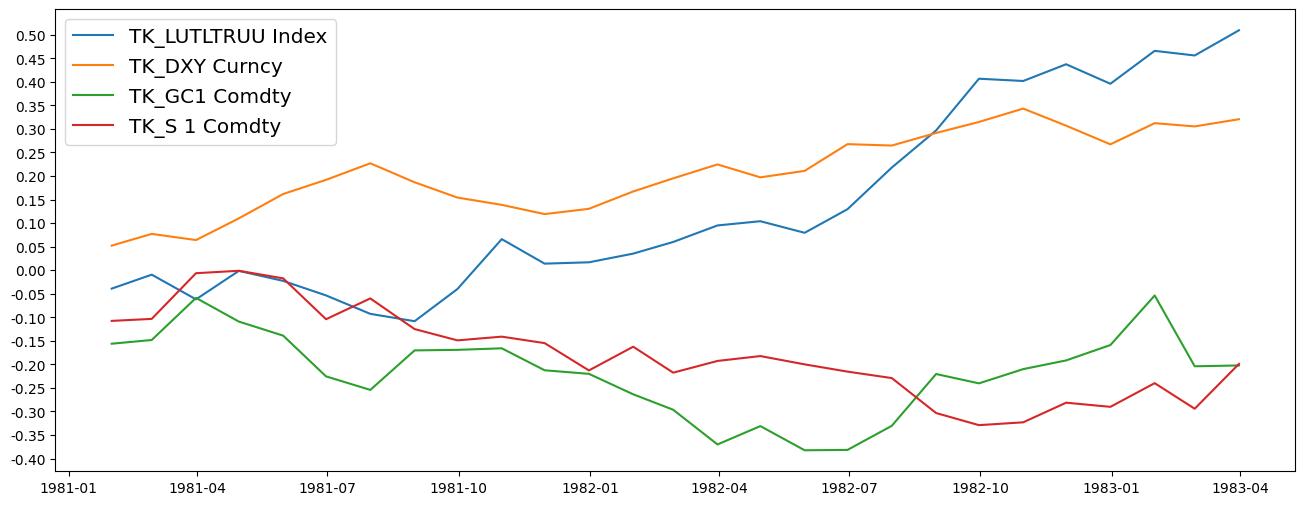

In [ ]:
plt.plot(구간1_누적[['TK_LUTLTRUU Index', 'TK_DXY Curncy','TK_GC1 Comdty', 'TK_S 1 Comdty']])
plt.legend(['TK_LUTLTRUU Index', 'TK_DXY Curncy','TK_GC1 Comdty', 'TK_S 1 Comdty'], fontsize='x-large')
plt.yticks([-0.40, -0.35 , -0.30, -0.25, -0.20, -0.15, -0.10, -0.05, 0 , 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])

In [ ]:
# 1국면 누적 상위 3개 자산
print(구간1_누적.iloc[-1].nlargest(3).index)
print(구간3_누적.iloc[-1].nlargest(3).index)

Index(['TK_LUTLTRUU Index', 'TK_DXY Curncy', 'TK_KOSPI Index'], dtype='object')
Index(['TK_LUTLTRUU Index', 'TK_SPX Index', 'TK_LT12TRUU Index'], dtype='object')


In [ ]:
# 1국면 상위 3개 자산
pd.concat([구간1_누적.iloc[-1], 구간3_누적.iloc[-1]],axis=1).mean(axis=1).nlargest(3)

US 국고장기채    1.029751
US 국고단기채    0.523294
구리 선물       0.442852
dtype: float64

In [ ]:
#작업용
r_1b = pd.DataFrame()
r_1b = pd.concat([구간1_누적.iloc[-1], 구간3_누적.iloc[-1]],axis=1).mean(axis=1).nlargest(3)
r_1b.reset_index()

,index,0
0,US 국고장기채,1.029751
1,US 국고단기채,0.523294
2,구리 선물,0.442852


In [ ]:
r_1w = pd.DataFrame()
r_1w = pd.concat([구간1_누적.iloc[-1], 구간3_누적.iloc[-1]],axis=1).mean(axis=1).nsmallest(3)
r_1w.reset_index()

,index,0
0,금 선물,-0.112915
1,필라델피아 금은지수,-0.080707
2,경질 원유 선물,-0.076473


In [ ]:
# 1국면 순위 - 시각화용
regime1_mr_df_rank = pd.DataFrame()
regime1_mr_df_rank['Best3'] = pd.concat([구간1_누적.iloc[-1], 구간3_누적.iloc[-1]],axis=1).mean(axis=1).nlargest(3).index
regime1_mr_df_rank['Best수익률(%)'] = r1b[0].round(3)*100
regime1_mr_df_rank['Worst3'] = pd.concat([구간1_누적.iloc[-1], 구간3_누적.iloc[-1]],axis=1).mean(axis=1).nsmallest(3).index
regime1_mr_df_rank['Worst수익률(%)'] = r1w[0].round(3)*100
regime1_mr_df_rank

,Best3,Best수익률(%),Worst3,Worst수익률(%)
0,US 국고장기채,103.0,금 선물,-11.3
1,US 국고단기채,52.3,필라델피아 금은지수,-8.1
2,구리 선물,44.3,경질 원유 선물,-7.6


In [ ]:
# 1국면 누적 하위 3개 자산
print(구간1_누적.iloc[-1].nsmallest(3).index)
print(구간3_누적.iloc[-1].nsmallest(3).index)

Index(['TK_GC1 Comdty', 'TK_S 1 Comdty', 'TK_CL1 Comdty'], dtype='object')
Index(['TK_USDJPY BGN Curncy', 'TK_DXY Curncy', 'TK_CL1 Comdty'], dtype='object')


In [ ]:
# 1국면 하위 3개 자산
pd.concat([구간1_누적.iloc[-1], 구간3_누적.iloc[-1]],axis=1).mean(axis=1).nsmallest(3)

TK_GC1 Comdty   -0.112915
TK_XAU Index    -0.080707
TK_CL1 Comdty   -0.076473
dtype: float64

In [ ]:
# 구간별 국면 작업
period_regime = pd.DataFrame({'구간':range(1,13),
                              '국면':[1, 2, 1, 3, 2, 4, 2, 4, 3, 4, 2, 4],
                              '기간':['1980-01 ~ 1983-03','1983-04 ~ 1987-09',
                                    '1987-10 ~ 1995-12', '1996-01 ~ 1998-11',
                                    '1998-12 ~ 2000-07','2000-08 ~ 2001-11',
                                    '2001-12 ~ 2002-11','2002-12 ~ 2008-03',
                                    '2008-04 ~ 2008-11','2008-12 ~ 2009-08',
                                    '2009-09 ~ 2010-05', '2010-06 ~ 2020-04']})
period_regime

,구간,국면,기간
0,1,1,1980-01 ~ 1983-03
1,2,2,1983-04 ~ 1987-09
2,3,1,1987-10 ~ 1995-12
3,4,3,1996-01 ~ 1998-11
4,5,2,1998-12 ~ 2000-07
5,6,4,2000-08 ~ 2001-11
6,7,2,2001-12 ~ 2002-11
7,8,4,2002-12 ~ 2008-03
8,9,3,2008-04 ~ 2008-11
9,10,4,2008-12 ~ 2009-08


In [ ]:
period_regime.set_index('구간', inplace=True)

In [ ]:
period_regime_1 = period_regime[period_regime['국면']==1]
period_regime_2 = period_regime[period_regime['국면']==2]
period_regime_3 = period_regime[period_regime['국면']==3]
period_regime_4 = period_regime[period_regime['국면']==4]

In [ ]:
period_regime_2

,국면,기간
구간,,
2,2,1983-04 ~ 1987-09
5,2,1998-12 ~ 2000-07
7,2,2001-12 ~ 2002-11
11,2,2009-09 ~ 2010-05


In [ ]:
# 2국면 누적 상위 3개 자산
print(구간2_누적.iloc[-1].nlargest(3).index)
print(구간5_누적.iloc[-1].nlargest(3).index)
print(구간7_누적.iloc[-1].nlargest(3).index)
print(구간11_누적.iloc[-1].nlargest(3).index)

Index(['TK_KOSPI Index', 'TK_NKY Index', 'TK_SPX Index'], dtype='object')
Index(['TK_CL1 Comdty', 'TK_DAX Index', 'TK_HG1 Comdty'], dtype='object')
Index(['TK_S 1 Comdty', 'TK_CL1 Comdty', 'TK_GC1 Comdty'], dtype='object')
Index(['TK_GC1 Comdty', 'TK_DXY Curncy', 'TK_HG1 Comdty'], dtype='object')


In [ ]:
# 평균으로 계산, 2국면 상위 3개
pd.concat([구간2_누적.iloc[-1],구간5_누적.iloc[-1],구간7_누적.iloc[-1],구간11_누적.iloc[-1]],axis=1).mean(axis=1).nlargest(3)

TK_KOSPI Index    0.840189
TK_NKY Index      0.371493
TK_CL1 Comdty     0.321140
dtype: float64

In [ ]:
regime2_mr_df_rank = pd.DataFrame()
regime2_mr_df_rank['Best3'] = pd.concat([구간2_누적.iloc[-1],구간5_누적.iloc[-1],구간7_누적.iloc[-1],구간11_누적.iloc[-1]],axis=1).mean(axis=1).nlargest(3).index
regime2_mr_df_rank['Worst3'] = pd.concat([구간2_누적.iloc[-1],구간5_누적.iloc[-1],구간7_누적.iloc[-1],구간11_누적.iloc[-1]],axis=1).mean(axis=1).nsmallest(3).index
regime2_mr_df_rank

,Best3,Worst3
0,코스피지수,USDJPY 현물환율(기준통화USD)
1,닛케이 225지수,대두 선물
2,경질 원유 선물,USDKRW 현물환율(기준통화USD)


In [ ]:
#작업용
r_2b = pd.DataFrame()
r_2b = pd.concat([구간2_누적.iloc[-1],구간5_누적.iloc[-1],구간7_누적.iloc[-1],구간11_누적.iloc[-1]],axis=1).mean(axis=1).nlargest(3)
r2b = r_2b.reset_index()
r_2w = pd.DataFrame()
r_2w = pd.concat([구간2_누적.iloc[-1],구간5_누적.iloc[-1],구간7_누적.iloc[-1],구간11_누적.iloc[-1]],axis=1).mean(axis=1).nsmallest(3)
r2w = r_2w.reset_index()

In [ ]:
# 2국면 순위 - 시각화용
regime2_mr_df_rank = pd.DataFrame()
regime2_mr_df_rank['Best3'] = pd.concat([구간2_누적.iloc[-1],구간5_누적.iloc[-1],구간7_누적.iloc[-1],구간11_누적.iloc[-1]],axis=1).mean(axis=1).nlargest(3).index
regime2_mr_df_rank['Best수익률(%)'] = r2b[0].round(3)*100
regime2_mr_df_rank['Worst3'] = pd.concat([구간2_누적.iloc[-1],구간5_누적.iloc[-1],구간7_누적.iloc[-1],구간11_누적.iloc[-1]],axis=1).mean(axis=1).nsmallest(3).index
regime2_mr_df_rank['Worst수익률(%)'] = r2w[0].round(3)*100
regime2_mr_df_rank

,Best3,Best수익률(%),Worst3,Worst수익률(%)
0,코스피지수,84.0,USDJPY 현물환율(기준통화USD),-13.0
1,닛케이 225지수,37.1,대두 선물,-4.3
2,경질 원유 선물,32.1,USDKRW 현물환율(기준통화USD),-3.3


In [ ]:
# 2국면 하위 3개
pd.concat([구간2_누적.iloc[-1],구간5_누적.iloc[-1],구간7_누적.iloc[-1],구간11_누적.iloc[-1]],axis=1).mean(axis=1).nsmallest(3)

TK_USDJPY BGN Curncy   -0.129871
TK_S 1 Comdty          -0.043047
TK_USDKRW BGN Curncy   -0.032612
dtype: float64

In [ ]:
# 2국면 누적 하위 3개 자산
print(구간2_누적.iloc[-1].nsmallest(3).index)
print(구간5_누적.iloc[-1].nsmallest(3).index)
print(구간7_누적.iloc[-1].nsmallest(3).index)
print(구간11_누적.iloc[-1].nsmallest(3).index)

Index(['TK_USDJPY BGN Curncy', 'TK_CL1 Comdty', 'TK_DXY Curncy'], dtype='object')
Index(['TK_XAU Index', 'TK_S 1 Comdty', 'TK_NKY Index'], dtype='object')
Index(['TK_DAX Index', 'TK_SPX Index', 'TK_NKY Index'], dtype='object')
Index(['TK_S 1 Comdty', 'TK_NKY Index', 'TK_USDJPY BGN Curncy'], dtype='object')


In [ ]:
period_regime_3

,국면,기간
구간,,
4,3,1996-01 ~ 1998-11
9,3,2008-04 ~ 2008-11


In [ ]:
# 3국면 상위 3개
pd.concat([구간4_누적.iloc[-1], 구간9_누적.iloc[-1]],axis=1).mean(axis=1).nlargest(3)

TK_USDKRW BGN Curncy    0.619709
TK_DAX Index            0.327978
TK_LUTLTRUU Index       0.217193
dtype: float64

In [ ]:
# 3국면 하위 3개
pd.concat([구간4_누적.iloc[-1], 구간9_누적.iloc[-1]],axis=1).mean(axis=1).nsmallest(3)

TK_KOSPI Index   -0.430361
TK_CL1 Comdty    -0.428522
TK_HG1 Comdty    -0.399091
dtype: float64

In [ ]:
#작업용
r_3b = pd.DataFrame()
r_3b = pd.concat([구간4_누적.iloc[-1], 구간9_누적.iloc[-1]],axis=1).mean(axis=1).nlargest(3)
r3b = r_3b.reset_index()
r_3w = pd.DataFrame()
r_3w = pd.concat([구간4_누적.iloc[-1], 구간9_누적.iloc[-1]],axis=1).mean(axis=1).nsmallest(3)
r3w = r_3w.reset_index()

In [ ]:
regime3_mr_df_rank = pd.DataFrame()
regime3_mr_df_rank['Best3'] = pd.concat([구간4_누적.iloc[-1], 구간9_누적.iloc[-1]],axis=1).mean(axis=1).nlargest(3).index
regime3_mr_df_rank['Best수익률(%)'] = r3b[0].round(3)*100
regime3_mr_df_rank['Worst3'] = pd.concat([구간4_누적.iloc[-1], 구간9_누적.iloc[-1]],axis=1).mean(axis=1).nsmallest(3).index
regime3_mr_df_rank['Worst수익률(%)'] = r3w[0].round(3)*100
regime3_mr_df_rank

,Best3,Best수익률(%),Worst3,Worst수익률(%)
0,USDKRW 현물환율(기준통화USD),62.0,코스피지수,-43.0
1,독일 DAX 30지수,32.8,경질 원유 선물,-42.9
2,US 국고장기채,21.7,구리 선물,-39.9


In [ ]:
period_regime_4

,국면,기간
구간,,
6,4,2000-08 ~ 2001-11
8,4,2002-12 ~ 2008-03
10,4,2008-12 ~ 2009-08
12,4,2010-06 ~ 2020-04


In [ ]:
# 4국면 상위 3
pd.concat([구간6_누적.iloc[-1],구간8_누적.iloc[-1],구간10_누적.iloc[-1],구간12_누적.iloc[-1]],axis=1).mean(axis=1).nlargest(3)

TK_HG1 Comdty        0.739202
TK_GC1 Comdty        0.526818
TK_LUTLTRUU Index    0.439776
dtype: float64

In [ ]:
# 4국면 하위 3
pd.concat([구간6_누적.iloc[-1],구간8_누적.iloc[-1],구간10_누적.iloc[-1],구간12_누적.iloc[-1]],axis=1).mean(axis=1).nsmallest(3)

TK_DXY Curncy          -0.044068
TK_USDKRW BGN Curncy   -0.030533
TK_USDJPY BGN Curncy    0.007783
dtype: float64

In [ ]:
#작업용
r_4b = pd.DataFrame()
r_4b = pd.concat([구간6_누적.iloc[-1],구간8_누적.iloc[-1],구간10_누적.iloc[-1],구간12_누적.iloc[-1]],axis=1).mean(axis=1).nlargest(3)
r4b = r_4b.reset_index()
r_4w = pd.DataFrame()
r_4w = pd.concat([구간6_누적.iloc[-1],구간8_누적.iloc[-1],구간10_누적.iloc[-1],구간12_누적.iloc[-1]],axis=1).mean(axis=1).nsmallest(3)
r4w = r_4w.reset_index()

In [ ]:
regime4_mr_df_rank = pd.DataFrame()
regime4_mr_df_rank['Best3'] = pd.concat([구간6_누적.iloc[-1],구간8_누적.iloc[-1],구간10_누적.iloc[-1],구간12_누적.iloc[-1]],axis=1).mean(axis=1).nlargest(3).index
regime4_mr_df_rank['Best수익률(%)'] = r4b[0].round(3)*100
regime4_mr_df_rank['Worst3'] = pd.concat([구간6_누적.iloc[-1],구간8_누적.iloc[-1],구간10_누적.iloc[-1],구간12_누적.iloc[-1]],axis=1).mean(axis=1).nsmallest(3).index
regime4_mr_df_rank['Worst수익률(%)'] = r4w[0].round(3)*100
regime4_mr_df_rank

,Best3,Best수익률(%),Worst3,Worst수익률(%)
0,구리 선물,73.9,달러인덱스,-4.4
1,금 선물,52.7,USDKRW 현물환율(기준통화USD),-3.1
2,US 국고장기채,44.0,USDJPY 현물환율(기준통화USD),0.8


In [ ]:
regime4_mr_df_rank = pd.DataFrame()
regime4_mr_df_rank['Best3'] = pd.concat([구간6_누적.iloc[-1],구간8_누적.iloc[-1],구간10_누적.iloc[-1],구간12_누적.iloc[-1]],axis=1).mean(axis=1).nlargest(3).index
regime4_mr_df_rank['Worst3'] = pd.concat([구간6_누적.iloc[-1],구간8_누적.iloc[-1],구간10_누적.iloc[-1],구간12_누적.iloc[-1]],axis=1).mean(axis=1).nsmallest(3).index
regime4_mr_df_rank

,Best3,Worst3
0,구리 선물,달러인덱스
1,금 선물,USDKRW 현물환율(기준통화USD)
2,US 국고장기채,USDJPY 현물환율(기준통화USD)


### EDA과정은 '월 수익률 작업.ipynb' 파일과, '누적 수익률.ipynb'파일에서 진행하였습니다.

# 향후 진행과정

1. 해당 누적 수익률을 바탕으로 포트폴리오 그래프 만들기(국면별 수익률 베스트 자산 50:50비율로 투자했을 때 최종수익률 vs 벤치마크) - 포트폴리오.ipnyb 파일에 있습니다.

2. 피처 추출을 통한 예측 모델 진행 및 성능 평가 - 예측모델 작업.ipynb, 국면예측작업.ipynb 파일에 있습니다.
